# INM427 Neural Computing
## Individual Project - Yumi Heo (Msc Data Science / 230003122)
## A Comparison of Multilayer Perceptrons and Support Vector Machines for Bank Churn Prediction

### 1. Data Processing

In [139]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import svm
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generate random numbers
random.seed(42)

In [3]:
# The dataset used for this project is the same one that was used for the group work
# Similarly to how the dataset was employed in the group work,
# only the training set is used for this project
# As the test set does not have the target data (the column named 'Exited') due to the competition,
# it is unnecessary for this case.
# The name of the training set has been changed to 'bank_churn_data.csv'.

# Read the dataset
df = pd.read_csv('bank_churn_data.csv')
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1,1,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0,0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1,1,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0,1,71173.03,0


In [4]:
# Check the data type
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
# Check for any null data
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Check the number of unique values in the target (the column 'Exited')
df['Exited'].nunique()

2

In [7]:
# Check the number of unique values in 'Gender' and 'Geography'.
print(df['Gender'].nunique())
print(df['Geography'].nunique())

2
3


In [8]:
# Remove irrelevant features in the dataset for a model
df = df.drop(['id', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1,1,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0,0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1,1,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0,1,71173.03,0


In [9]:
# Change the string to numeric types(integer) for 'Gender'
map_dict = {'Female' : 0, 'Male' : 1}
df['Gender'] = df['Gender'].map(map_dict).astype(int)

In [10]:
# Check whether the change has been applied and count the number
df['Gender'].value_counts()

1    93150
0    71884
Name: Gender, dtype: int64

In [11]:
# Check which countries are listed under 'Geography' and count the number
df['Geography'].value_counts()

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

In [12]:
# Change the string to numeric types(integer) for 'Geography'
map_dict = {'France' : 0, 'Spain' : 1, 'Germany' : 2}
df['Geography'] = df['Geography'].map(map_dict).astype(int)

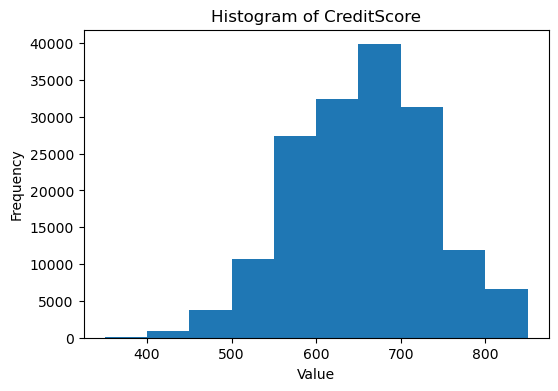

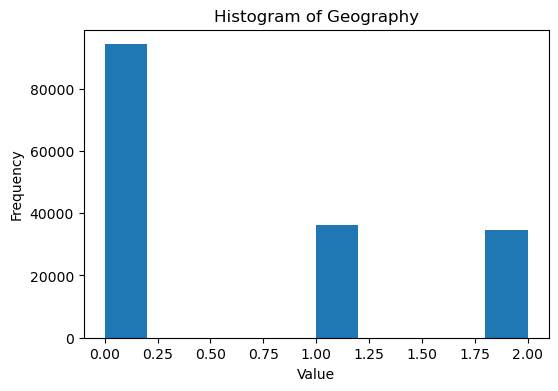

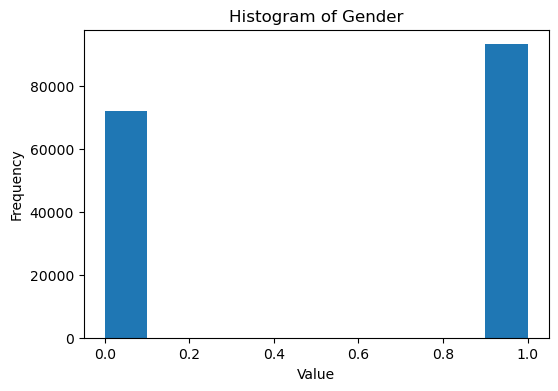

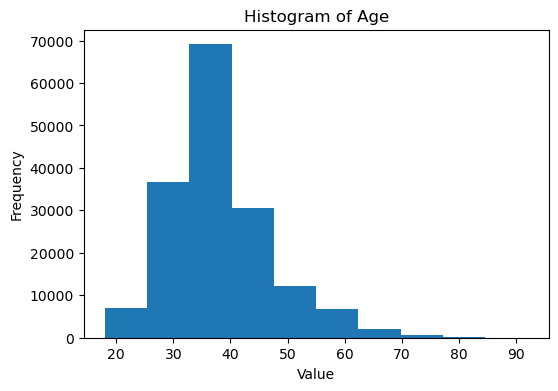

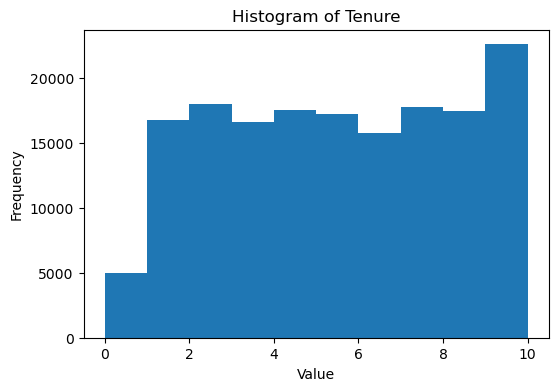

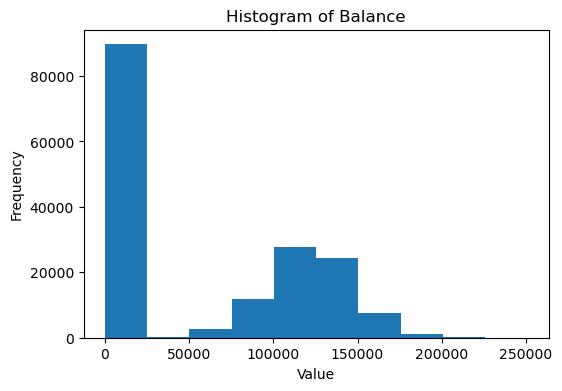

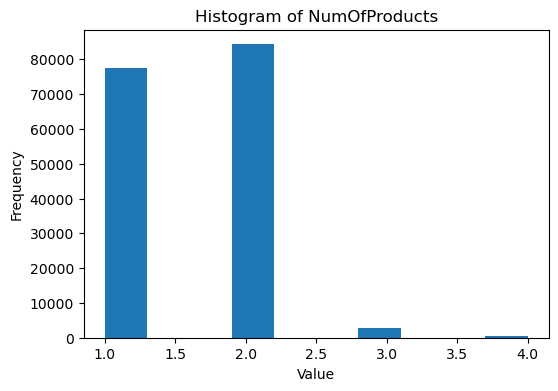

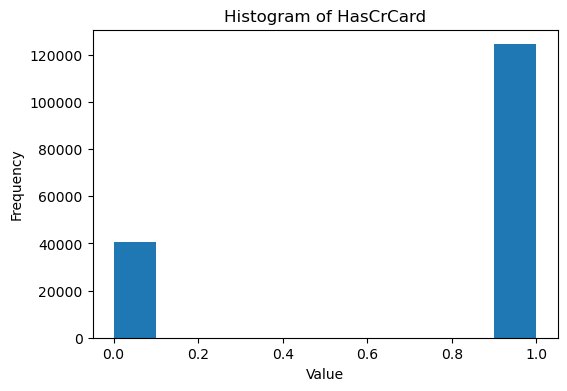

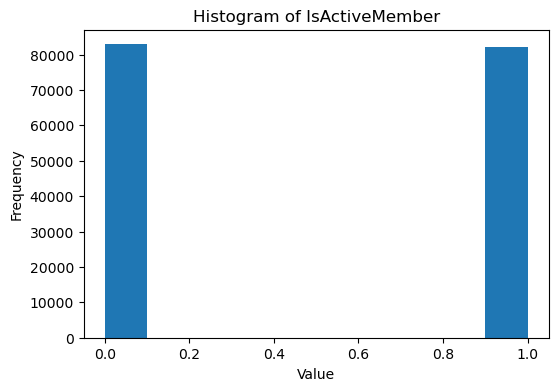

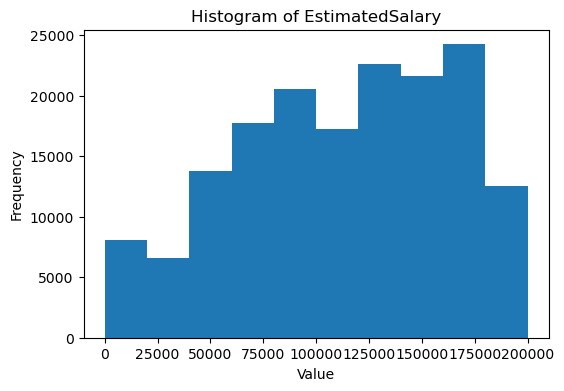

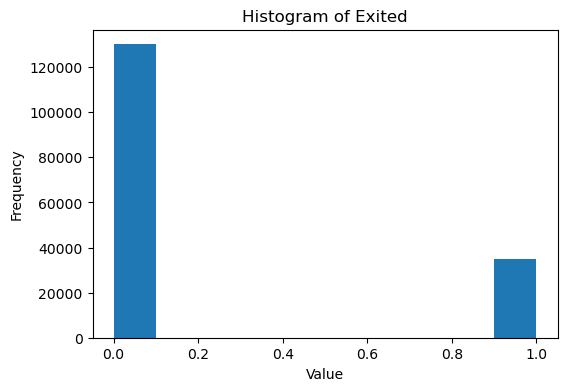

In [13]:
# Check the distribution in each feature
# The code below is from a part of the group work related to data processing
for column in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=10)
    plt.title('Histogram of {}'.format(column))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [14]:
# Check the number of unique values in 'Balance'
df['Balance'].value_counts()

0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: Balance, Length: 30075, dtype: int64

There is a large proportion of '0' in 'Balance'. It should be examined whether to remove the data with '0' in 'Balance' or not, as this data might affect the sensitivity of the class distribution.

In [15]:
# Conduct basic statistical analysis on the 'Balance'
df['Balance'].describe()

count    165034.000000
mean      55478.086689
std       62817.663278
min           0.000000
25%           0.000000
50%           0.000000
75%      119939.517500
max      250898.090000
Name: Balance, dtype: float64

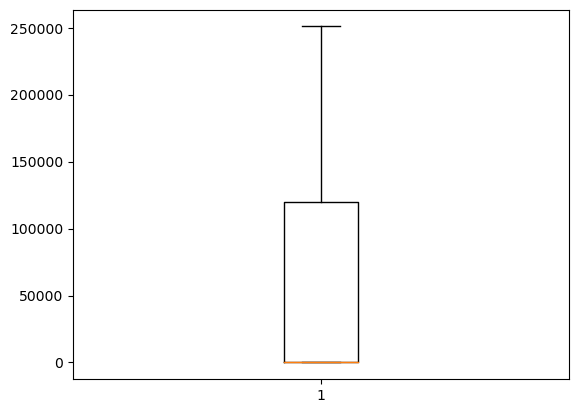

In [16]:
# Check the distribution of 'Balance' using a boxplot
plt.boxplot(df['Balance']);

The percentage of data that is 0 is large since the minimum, first quartile and second quartile are all 0.

In [17]:
# Check the distribution of the other features and 'Exited'(target) when the balance is 0.
# Select the data with 0 in 'Balance'.
df_0_balance = df[df['Balance'] == 0]
df_0_balance

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.0,2,1,0,181449.97,0
1,627,0,1,33.0,1,0.0,2,1,1,49503.50,0
2,678,0,1,40.0,10,0.0,2,1,0,184866.69,0
4,716,1,1,33.0,5,0.0,2,1,1,15068.83,0
8,676,0,1,43.0,4,0.0,2,1,0,142917.13,0
...,...,...,...,...,...,...,...,...,...,...,...
165028,630,0,1,50.0,8,0.0,2,1,1,5962.50,0
165029,667,1,0,33.0,2,0.0,1,1,1,131834.75,0
165030,792,0,1,35.0,3,0.0,1,0,0,131834.45,0
165031,565,0,1,31.0,5,0.0,1,1,1,127429.56,0


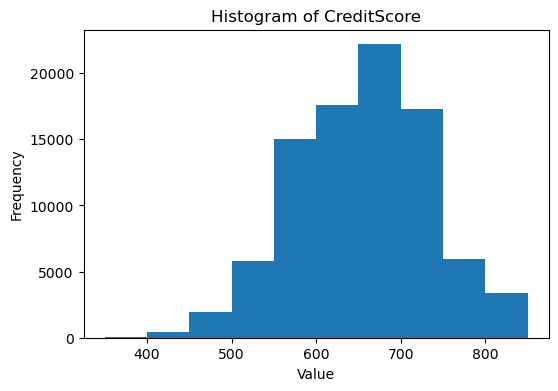

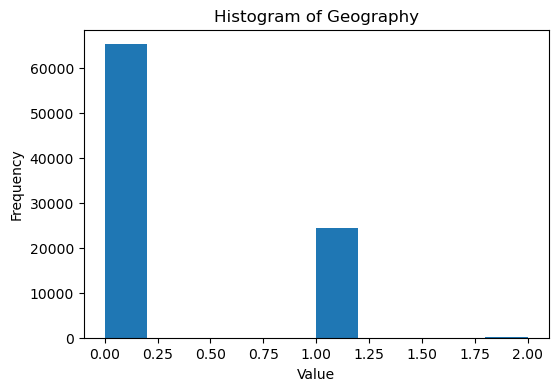

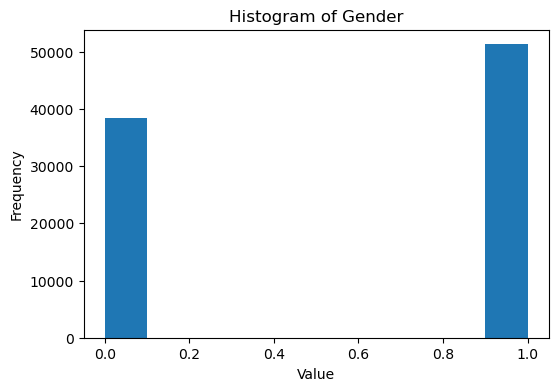

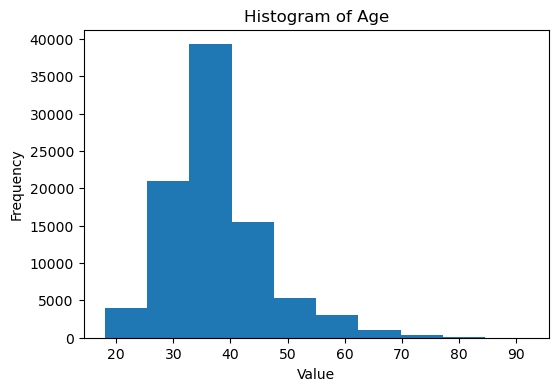

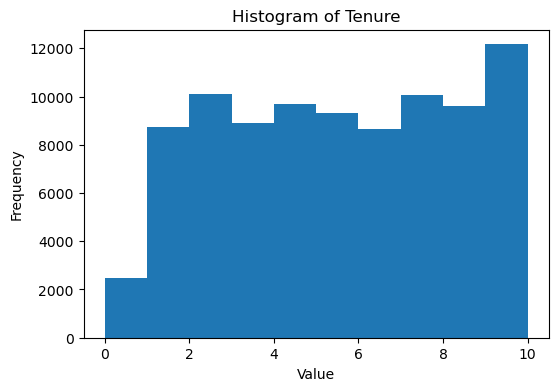

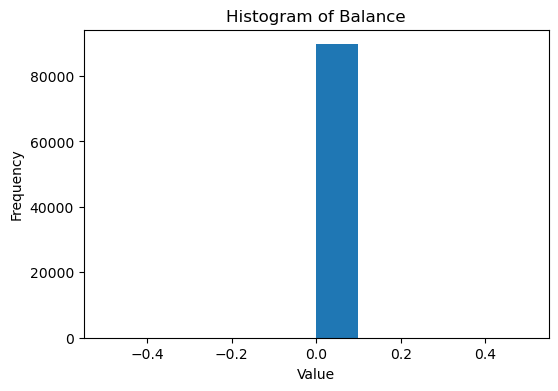

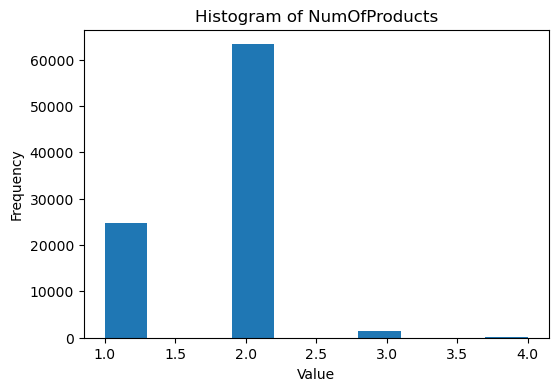

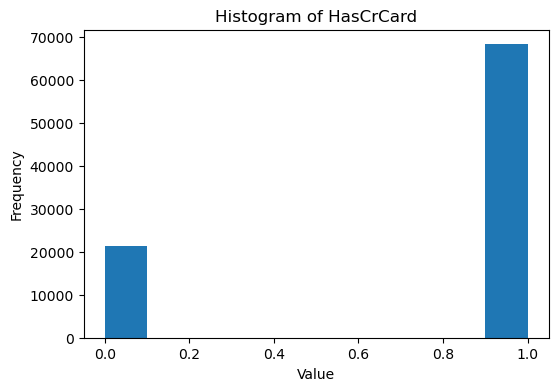

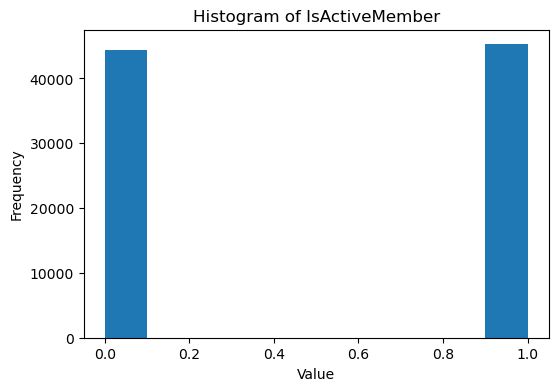

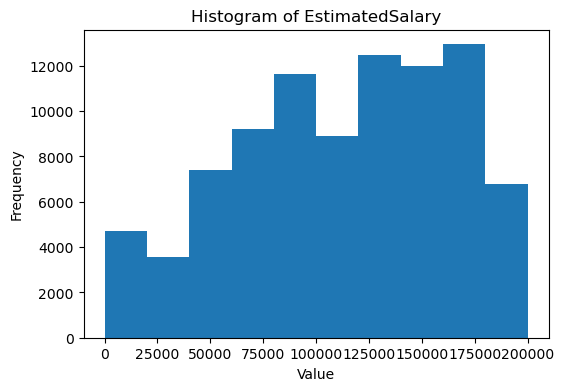

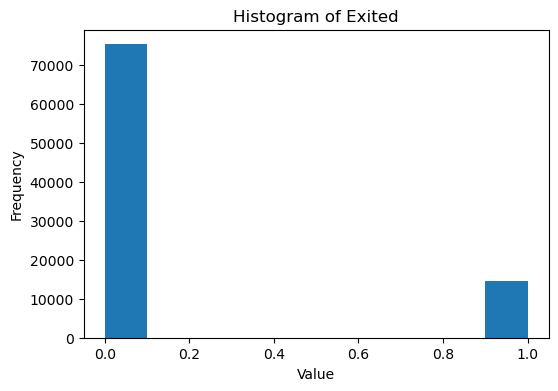

In [18]:
# Check each distribution of the features in 'df_0_balance'.
# The code below is from a part of the group work related to data processing
for column in df_0_balance.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df_0_balance[column], bins=10)
    plt.title('Histogram of {}'.format(column))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [19]:
# Check the distribution of the other features and 'Exited'(target) when the balance is not 0.
# Select the data without 0 in 'Balance'.
df_no0_balance = df[df['Balance'] != 0]
df_no0_balance

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3,581,0,1,34.0,2,148882.54,1,1,1,84560.88,0
5,588,2,1,36.0,4,131778.58,1,1,0,136024.31,1
6,593,0,0,30.0,8,144772.69,1,1,0,29792.11,0
7,678,1,1,37.0,1,138476.41,1,1,0,106851.60,0
9,583,2,1,40.0,4,81274.33,1,1,1,170843.07,0
...,...,...,...,...,...,...,...,...,...,...,...
165020,679,0,1,32.0,8,145974.79,1,1,0,138875.86,0
165024,592,2,0,33.0,3,110993.29,2,1,1,176747.66,1
165026,724,2,1,59.0,2,68999.66,1,1,1,66879.27,0
165027,767,0,0,44.0,4,76554.06,2,1,0,77837.63,0


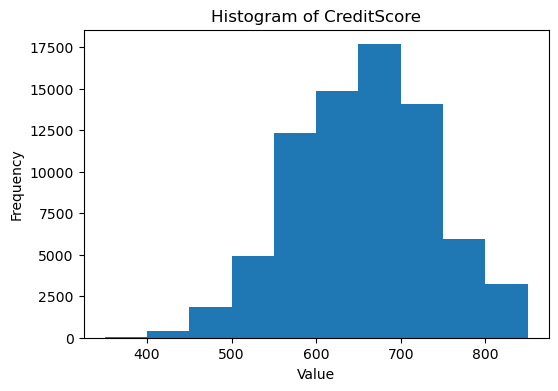

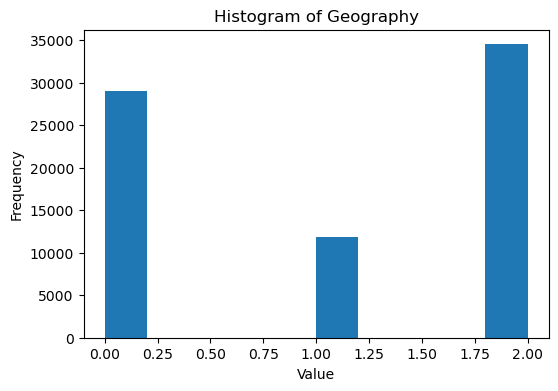

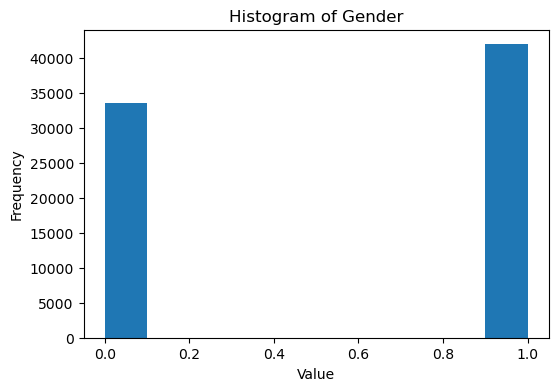

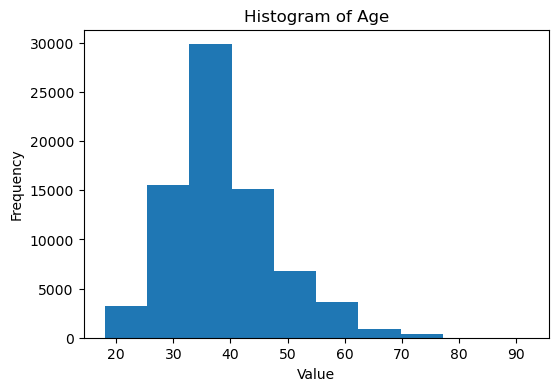

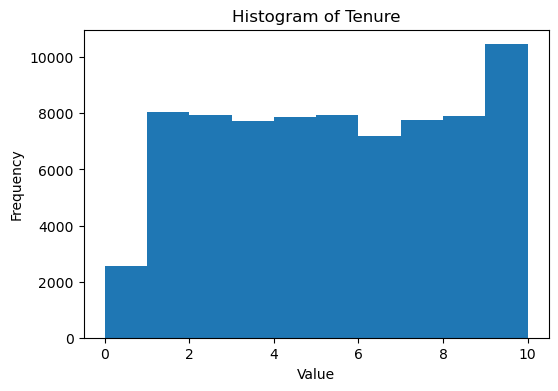

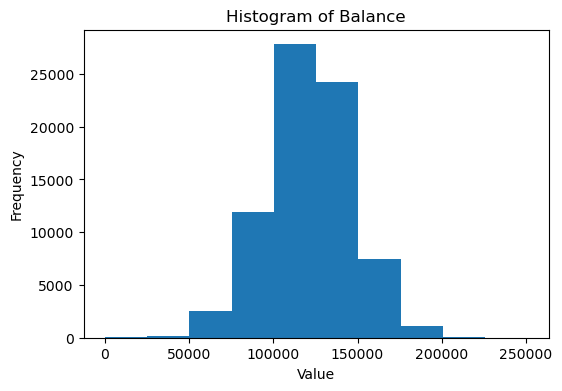

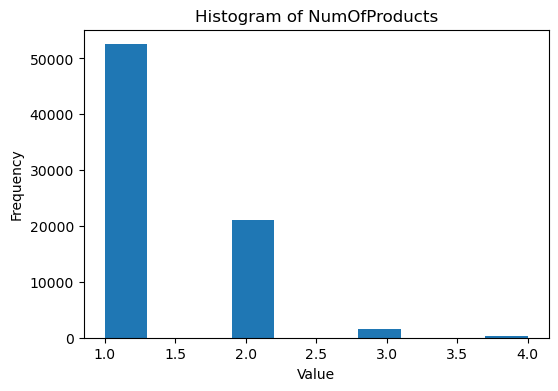

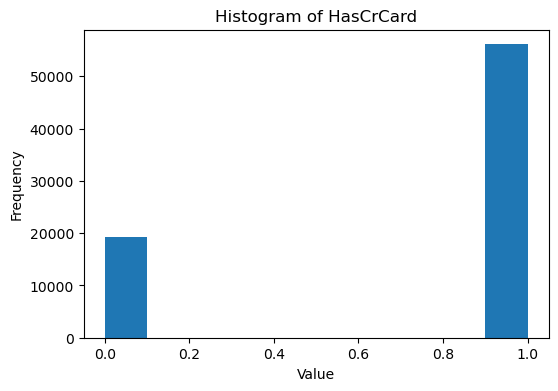

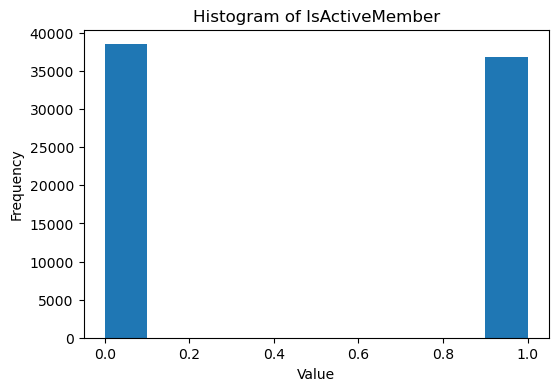

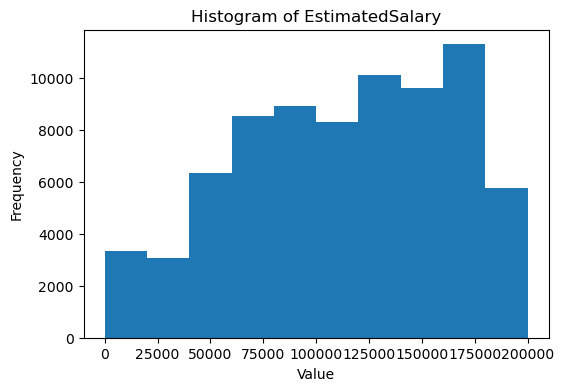

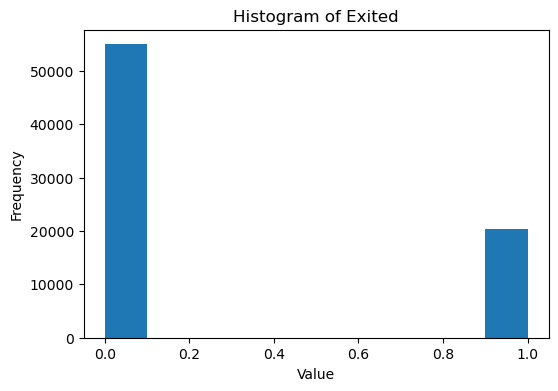

In [20]:
# Check each distribution of the features in 'df_no0_balance'.
# The code below is from a part of the group work related to data processing
for column in df_0_balance.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df_no0_balance[column], bins=10)
    plt.title('Histogram of {}'.format(column))
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

Text(0.5, 1.0, 'Exited (Without 0 in Balance)')

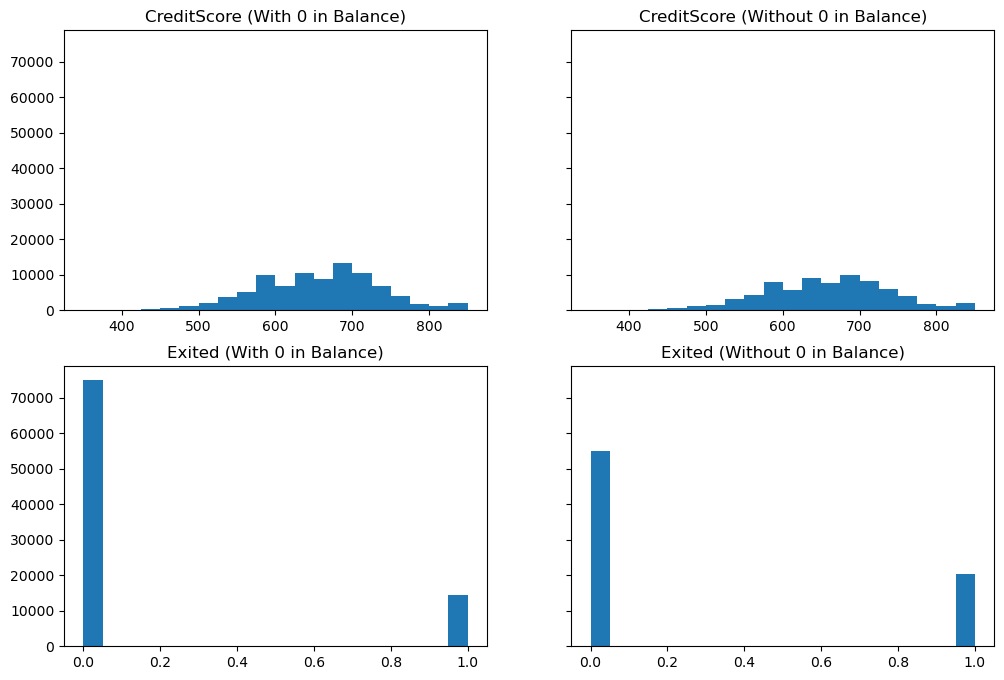

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axs[0, 0].hist(df_0_balance['CreditScore'], bins=20)
axs[0, 0].set_title('CreditScore (With 0 in Balance)')

axs[0, 1].hist(df_no0_balance['CreditScore'], bins=20)
axs[0, 1].set_title('CreditScore (Without 0 in Balance)')

axs[1, 0].hist(df_0_balance['Exited'], bins=20)
axs[1, 0].set_title('Exited (With 0 in Balance)')

axs[1, 1].hist(df_no0_balance['Exited'], bins=20)
axs[1, 1].set_title('Exited (Without 0 in Balance)')

As both datasets have a similar distribution, it implies that the dataset with 0 in 'Balance is not significantly different from the dataset without 0 in 'Balance' in terms of its impact on the target.

Therefore, the data with the value of 0 in 'Balance' will be remained.

<Axes: >

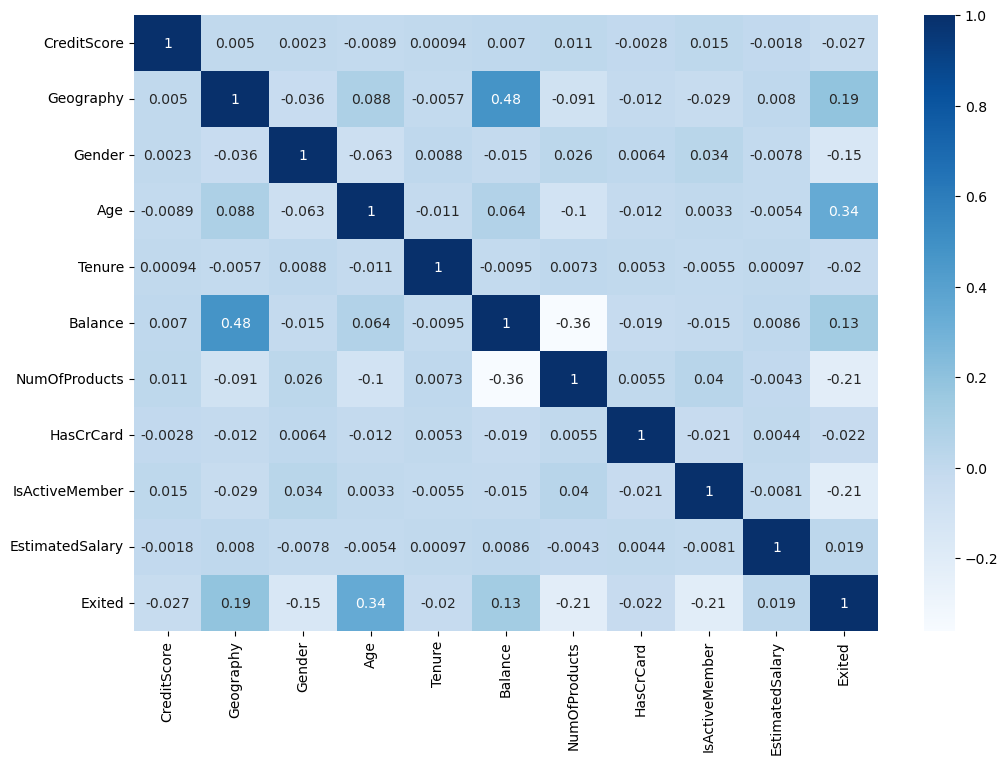

In [22]:
# Check the correlation coefficient of the original dataset
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='Blues', annot=True)

When checking the correlation coefficient, there are no feature relationships that show a high correlation coefficient, so the currently existing features will be used in the model as is.

### 2. Split the dataset into features and the target

In [114]:
# Split the dataset to make X(features) and y(target)
X = df.iloc[:, 0:10]
y = df.iloc[:, 10]
print(X)
print(y)

        CreditScore  Geography  Gender   Age  Tenure    Balance  \
0               668          0       1  33.0       3       0.00   
1               627          0       1  33.0       1       0.00   
2               678          0       1  40.0      10       0.00   
3               581          0       1  34.0       2  148882.54   
4               716          1       1  33.0       5       0.00   
...             ...        ...     ...   ...     ...        ...   
165029          667          1       0  33.0       2       0.00   
165030          792          0       1  35.0       3       0.00   
165031          565          0       1  31.0       5       0.00   
165032          554          1       0  30.0       7  161533.00   
165033          850          0       1  31.0       1       0.00   

        NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                   2          1               0        181449.97  
1                   2          1               1         49

In [115]:
# Check the type of the values in variables and the dimension
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(165034, 10)
(165034,)


In [116]:
# Check the data type of the values in the normalized X(X_norm)
print(type(X_norm))

<class 'numpy.ndarray'>


In [117]:
# Restore 'X_norm' back to 'X'
X = X_norm
# Convert Pandas to Numpy array
y = y.values

# Check the type of the values in variables and the dimension
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(165034, 10)
(165034,)


In [118]:
# Convert Numpy array to Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Check the type of the values in variables and the dimension
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([165034, 10])
torch.Size([165034])


In [119]:
# Ensure that the dimensions of X and y are the same
y = y.unsqueeze(1)

# Check the data type, dimension, and the class type of X and y
print(X.dtype, X.shape, type(X))
print(y.dtype, y.shape, type(y))

torch.float32 torch.Size([165034, 10]) <class 'torch.Tensor'>
torch.float32 torch.Size([165034, 1]) <class 'torch.Tensor'>


In [120]:
# Import libraries to split the data
from sklearn.model_selection import train_test_split

# Split the data into training and test sets before applying stratified k-fold cross-validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the test set into validation (50%) and test (50%).
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Check each dimension
print("Training set:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nValidation set:")
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("\nTest set:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set:
X_train: torch.Size([132027, 10])
y_train: torch.Size([132027, 1])

Validation set:
X_val: torch.Size([16504, 10])
y_val: torch.Size([16504, 1])

Test set:
X_test: torch.Size([16503, 10])
y_test: torch.Size([16503, 1])


In [121]:
# Normalise the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)

In [122]:
X_train = torch.tensor(X_train_norm, dtype=torch.float32)

In [123]:
X_train.shape

torch.Size([132027, 10])

In [124]:
y_train.shape

torch.Size([132027, 1])

### 3. Build the baseline model with Multilayer Perceptrons(MLP)

#### Define the first model with MLP

In [177]:
# Define the baseline MLP model
class MLP_model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP_model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        output_layer1 = self.fc1(x)
        layer1_activated = self.relu(output_layer1)
        output_layer2 = self.fc2(layer1_activated)
        output_activated = self.sigmoid(output_layer2)
        return output_activated

In [178]:
# Define the structure of the baseline of MLP model
input_size = 10
output_size = 1
hidden_size = 6 #random number (https://www.heatonresearch.com/2017/06/01/hidden-layers.html#:~:text=The%20number%20of%20hidden%20neurons%20should%20be%202%2F3%20the,size%20of%20the%20input%20layer.)

#### Use the stratified K-Fold cross-validation

In [179]:
# Import stratified K-Fold cross-validator since the target is imbalanced
from sklearn.model_selection import StratifiedKFold

In [180]:
# Set the number of K
k_folds = 3 # Random number

In [181]:
# Set the validator and make sure shuffling occurs, which means samples within each split will be randomly shuffled
kfold = StratifiedKFold(n_splits=k_folds, shuffle=True)

#### Use batches

In [182]:
# Import the library to use the batch for training
from torch.utils.data import TensorDataset, DataLoader

# Set the batch size
batch_size = 1000 # Random number

# Convert training and test data into TensorDatasets
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

# Create DataLoader objects for training and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#### Train the first MLP model

In [183]:
# Set the number of epochs
number_of_epochs = 100 # Random number

In [184]:
# Set the baseline of MLP model, loss function and optimizer
baseline_mlp_model = MLP_model(input_size, hidden_size, output_size)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(baseline_mlp_model.parameters(), lr=0.001) # The learning rate is set to the default value

In [185]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold + 1}/{k_folds}')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Convert fold data into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Create DataLoader objects for fold training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)
    
    # Train for each fold
    for epoch in range(number_of_epochs):
        baseline_mlp_model.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = baseline_mlp_model(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Fold [{fold + 1}/{k_folds}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        baseline_mlp_model.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = baseline_mlp_model(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Fold [{fold + 1}/{k_folds}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")


Fold 1/3
Epoch [1/100], Fold [1/3], Train Loss: 0.7966
Epoch [1/100], Fold [1/3], Validation Loss: 0.7301
Epoch [2/100], Fold [1/3], Train Loss: 0.6801
Epoch [2/100], Fold [1/3], Validation Loss: 0.6298
Epoch [3/100], Fold [1/3], Train Loss: 0.5903
Epoch [3/100], Fold [1/3], Validation Loss: 0.5559
Epoch [4/100], Fold [1/3], Train Loss: 0.5368
Epoch [4/100], Fold [1/3], Validation Loss: 0.5228
Epoch [5/100], Fold [1/3], Train Loss: 0.5154
Epoch [5/100], Fold [1/3], Validation Loss: 0.5094
Epoch [6/100], Fold [1/3], Train Loss: 0.5035
Epoch [6/100], Fold [1/3], Validation Loss: 0.4976
Epoch [7/100], Fold [1/3], Train Loss: 0.4901
Epoch [7/100], Fold [1/3], Validation Loss: 0.4829
Epoch [8/100], Fold [1/3], Train Loss: 0.4751
Epoch [8/100], Fold [1/3], Validation Loss: 0.4687
Epoch [9/100], Fold [1/3], Train Loss: 0.4618
Epoch [9/100], Fold [1/3], Validation Loss: 0.4573
Epoch [10/100], Fold [1/3], Train Loss: 0.4518
Epoch [10/100], Fold [1/3], Validation Loss: 0.4490
Epoch [11/100], Fol

Epoch [84/100], Fold [1/3], Train Loss: 0.3398
Epoch [84/100], Fold [1/3], Validation Loss: 0.3383
Epoch [85/100], Fold [1/3], Train Loss: 0.3397
Epoch [85/100], Fold [1/3], Validation Loss: 0.3382
Epoch [86/100], Fold [1/3], Train Loss: 0.3396
Epoch [86/100], Fold [1/3], Validation Loss: 0.3381
Epoch [87/100], Fold [1/3], Train Loss: 0.3394
Epoch [87/100], Fold [1/3], Validation Loss: 0.3379
Epoch [88/100], Fold [1/3], Train Loss: 0.3392
Epoch [88/100], Fold [1/3], Validation Loss: 0.3379
Epoch [89/100], Fold [1/3], Train Loss: 0.3392
Epoch [89/100], Fold [1/3], Validation Loss: 0.3382
Epoch [90/100], Fold [1/3], Train Loss: 0.3391
Epoch [90/100], Fold [1/3], Validation Loss: 0.3376
Epoch [91/100], Fold [1/3], Train Loss: 0.3391
Epoch [91/100], Fold [1/3], Validation Loss: 0.3377
Epoch [92/100], Fold [1/3], Train Loss: 0.3390
Epoch [92/100], Fold [1/3], Validation Loss: 0.3375
Epoch [93/100], Fold [1/3], Train Loss: 0.3388
Epoch [93/100], Fold [1/3], Validation Loss: 0.3375
Epoch [94/

Epoch [67/100], Fold [2/3], Train Loss: 0.3358
Epoch [67/100], Fold [2/3], Validation Loss: 0.3361
Epoch [68/100], Fold [2/3], Train Loss: 0.3357
Epoch [68/100], Fold [2/3], Validation Loss: 0.3364
Epoch [69/100], Fold [2/3], Train Loss: 0.3357
Epoch [69/100], Fold [2/3], Validation Loss: 0.3363
Epoch [70/100], Fold [2/3], Train Loss: 0.3357
Epoch [70/100], Fold [2/3], Validation Loss: 0.3362
Epoch [71/100], Fold [2/3], Train Loss: 0.3357
Epoch [71/100], Fold [2/3], Validation Loss: 0.3362
Epoch [72/100], Fold [2/3], Train Loss: 0.3356
Epoch [72/100], Fold [2/3], Validation Loss: 0.3363
Epoch [73/100], Fold [2/3], Train Loss: 0.3356
Epoch [73/100], Fold [2/3], Validation Loss: 0.3361
Epoch [74/100], Fold [2/3], Train Loss: 0.3356
Epoch [74/100], Fold [2/3], Validation Loss: 0.3361
Epoch [75/100], Fold [2/3], Train Loss: 0.3357
Epoch [75/100], Fold [2/3], Validation Loss: 0.3360
Epoch [76/100], Fold [2/3], Train Loss: 0.3356
Epoch [76/100], Fold [2/3], Validation Loss: 0.3365
Epoch [77/

Epoch [50/100], Fold [3/3], Train Loss: 0.3348
Epoch [50/100], Fold [3/3], Validation Loss: 0.3367
Epoch [51/100], Fold [3/3], Train Loss: 0.3346
Epoch [51/100], Fold [3/3], Validation Loss: 0.3365
Epoch [52/100], Fold [3/3], Train Loss: 0.3345
Epoch [52/100], Fold [3/3], Validation Loss: 0.3364
Epoch [53/100], Fold [3/3], Train Loss: 0.3349
Epoch [53/100], Fold [3/3], Validation Loss: 0.3364
Epoch [54/100], Fold [3/3], Train Loss: 0.3345
Epoch [54/100], Fold [3/3], Validation Loss: 0.3364
Epoch [55/100], Fold [3/3], Train Loss: 0.3345
Epoch [55/100], Fold [3/3], Validation Loss: 0.3364
Epoch [56/100], Fold [3/3], Train Loss: 0.3345
Epoch [56/100], Fold [3/3], Validation Loss: 0.3366
Epoch [57/100], Fold [3/3], Train Loss: 0.3348
Epoch [57/100], Fold [3/3], Validation Loss: 0.3364
Epoch [58/100], Fold [3/3], Train Loss: 0.3344
Epoch [58/100], Fold [3/3], Validation Loss: 0.3366
Epoch [59/100], Fold [3/3], Train Loss: 0.3345
Epoch [59/100], Fold [3/3], Validation Loss: 0.3366
Epoch [60/

In [186]:
len(train_losses)

300

In [187]:
len(val_losses)

300

In [188]:
# Initialize an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch (every k_folds-th element)
    epoch_losses = train_losses[epoch::number_of_epochs]
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [189]:
# Initialize an empty list to store average train losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch (every k_folds-th element)
    epoch_val_losses = val_losses[epoch::number_of_epochs]
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average train losses
    average_val_losses.append(average_epoch_val_loss)

In [190]:
# Create a numpy list for epochs which starts from 1.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)
print(len(Epochs))

100


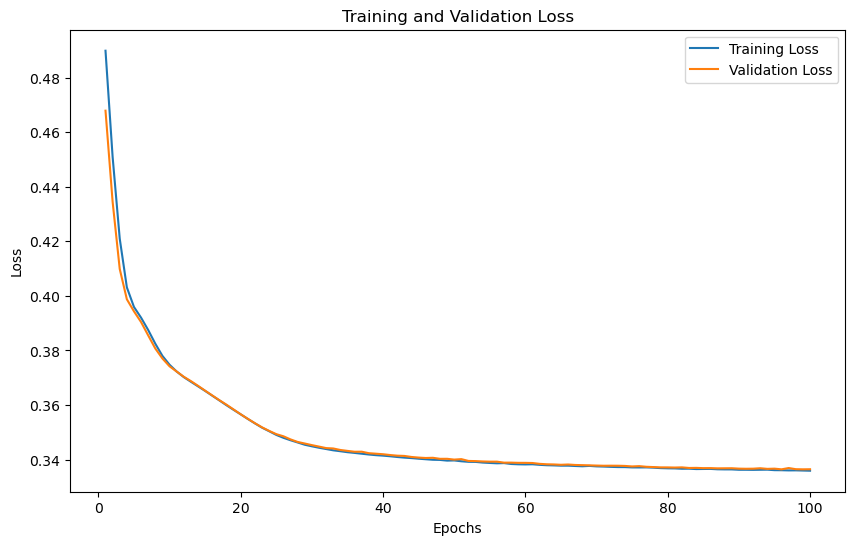

In [191]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [133]:
# Import the library to calculate the time for training
import time

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Set the start timer
start_time = time.time()

# Training
for epoch in range(number_of_epochs):
    
    baseline_mlp_model.train()
    
    # New variable to track the training loss in each epoch
    epoch_train_loss = 0.0
    
    # Iterate over batches in train_loader
    for batch_X_train, batch_y_train in train_loader:
        optimizer.zero_grad()
        
        # Feed forward
        outputs = baseline_mlp_model(batch_X_train)
        
        # Calculate loss
        loss = criterion(outputs, batch_y_train)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        # Keep adding each batch loss to the loss in epochs
        epoch_train_loss += loss.item() * batch_X_train.size(0)  # Multiply by batch size
    
    # Calculate average train loss for the epoch
    epoch_train_loss /= len(train_loader.dataset)
    
    # Store training loss for plotting
    train_losses.append(epoch_train_loss)
    
    # Print train loss
    print(f'Epoch [{epoch+1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
    
    # Validation
    baseline_mlp_model.eval()
    
    # New variable to track the validation loss in each epoch
    epoch_val_loss = 0.0
    
    with torch.no_grad():
        for batch_X_val, batch_y_val in val_loader:
            outputs_val = baseline_mlp_model(batch_X_val)
            
            # Calculate loss
            val_loss = criterion(outputs_val, batch_y_val)
            
            # Keep adding each bach loss to get the loss in epochs
            epoch_val_loss += val_loss.item() * batch_X_val.size(0)  # Multiply by batch size
    
    # Calculate average validation loss for the epoch
    epoch_val_loss /= len(val_loader.dataset)
    
    # Store validation loss for plotting
    val_losses.append(epoch_val_loss)
    
    # Print validation loss
    print(f'Epoch [{epoch+1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_time, "seconds")

Epoch [1/100], Train Loss: 0.6595
Epoch [1/100], Validation Loss: 0.5273
Epoch [2/100], Train Loss: 0.5016
Epoch [2/100], Validation Loss: 0.4818
Epoch [3/100], Train Loss: 0.4729
Epoch [3/100], Validation Loss: 0.4593
Epoch [4/100], Train Loss: 0.4544
Epoch [4/100], Validation Loss: 0.4447
Epoch [5/100], Train Loss: 0.4429
Epoch [5/100], Validation Loss: 0.4355
Epoch [6/100], Train Loss: 0.4345
Epoch [6/100], Validation Loss: 0.4281
Epoch [7/100], Train Loss: 0.4276
Epoch [7/100], Validation Loss: 0.4221
Epoch [8/100], Train Loss: 0.4219
Epoch [8/100], Validation Loss: 0.4169
Epoch [9/100], Train Loss: 0.4166
Epoch [9/100], Validation Loss: 0.4122
Epoch [10/100], Train Loss: 0.4120
Epoch [10/100], Validation Loss: 0.4083
Epoch [11/100], Train Loss: 0.4081
Epoch [11/100], Validation Loss: 0.4052
Epoch [12/100], Train Loss: 0.4051
Epoch [12/100], Validation Loss: 0.4027
Epoch [13/100], Train Loss: 0.4029
Epoch [13/100], Validation Loss: 0.4010
Epoch [14/100], Train Loss: 0.4012
Epoch [1

In [134]:
# Create a numpy list for epochs which starts from 1.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)

numpy.ndarray

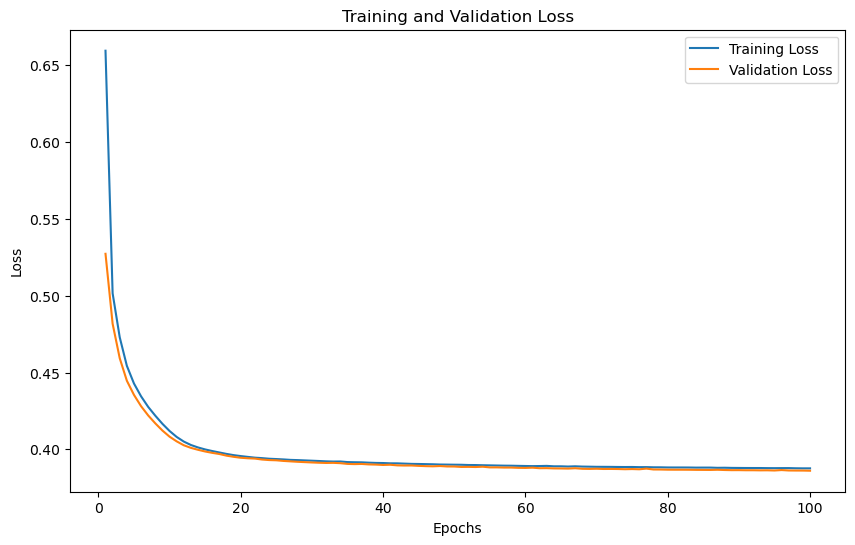

In [135]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, train_losses, label='Training Loss')
plt.plot(Epochs, val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [193]:
# Test the model on the test set
baseline_mlp_model.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Feed forward
        outputs_test = baseline_mlp_model(batch_X_test)
        
        # Convert test outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')


Test Accuracy: 86.13


In [194]:
# Calculate = True Positive (TP), True Nagative (TN), False Positive (FP), False Nagative (FN)
# The code in this block is from the coursework
TP = ((outputs_test.round() == 1) & (batch_y_test == 1)).sum().item()
TN = ((outputs_test.round() == 0) & (batch_y_test == 0)).sum().item()
FP = ((outputs_test.round() == 1) & (batch_y_test == 0)).sum().item()
FN = ((outputs_test.round() == 0) & (batch_y_test == 1)).sum().item()

# Calculate the confusion matrix
# Measure Precision, Recall, and F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Test Precision: {precision*100:.2f}')
print(f'Test Recall: {recall*100:.2f}')
print(f'Test F1 score: {f1*100:.2f}')

Test Precision: 75.90
Test Recall: 55.75
Test F1 score: 64.29


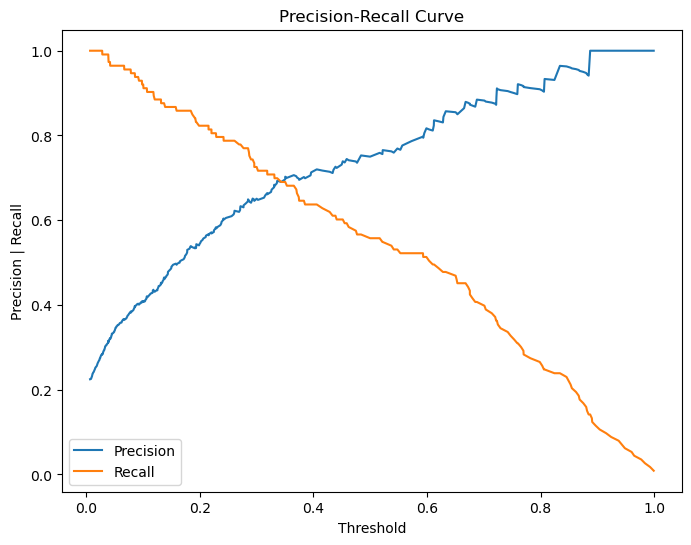

In [195]:
# Import the library to plot precision-recall curve
from sklearn.metrics import precision_recall_curve

# Assign precisions, recalls, and the thresholds between two evaluation indicators
precisions, recalls, thresholds = precision_recall_curve(batch_y_test, outputs_test)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision | Recall')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [196]:
# Calculate F1 score for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the index of the threshold with the maximum F1 score
best_threshold_index = np.argmax(f1_scores)

# Get the threshold from the index of the threshold
best_threshold = thresholds[best_threshold_index]

print(f'Best Threshold: {best_threshold}')

Best Threshold: 0.2850048542022705


#### Find the value of the hidden node using sklearn's MLPClassifier

- 1 hidden layer

In [67]:
from sklearn.neural_network import MLPClassifier

In [68]:
hidden_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
best_accuracy = 0
best_hidden_units = None
accuracies = []

for size in hidden_sizes:
    # Initialize MLPClassifier with current number of hidden units in each hidden layer
    clf = MLPClassifier(hidden_layer_sizes=(size, ), random_state=42, batch_size=1000)
    
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    
    # Evaluate accuracy on the test data
    accuracy = clf.score(X_test, y_test)
    accuracies.append(accuracy)
    
    # Check if current accuracy is better than the previous best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_hidden_units = (size, )

print(f'Best Accuracy: {best_accuracy*100:.2f}')
print("Best Hidden Units:", best_hidden_units)

/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConve

Best Accuracy: 86.25
Best Hidden Units: (6,)


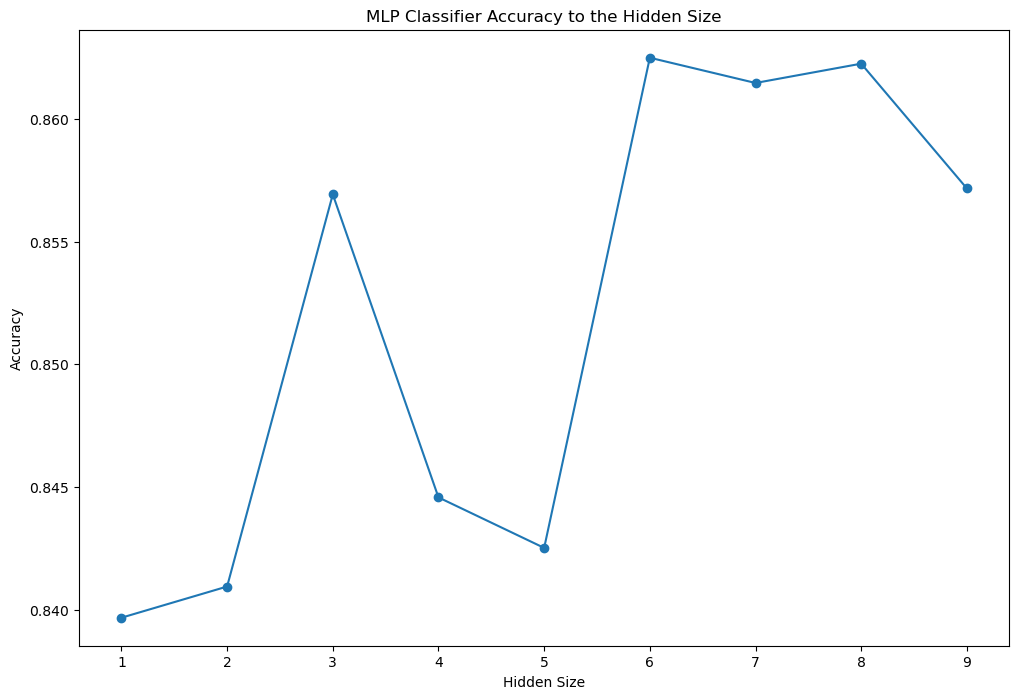

In [69]:
plt.figure(figsize=(12, 8))
plt.plot(hidden_sizes, accuracies, marker='o')
plt.title('MLP Classifier Accuracy to the Hidden Size')
plt.xlabel('Hidden Size')
plt.ylabel('Accuracy')
plt.show()

#### Find the best optimizer and activation function for a single hidden layer of the baseline MLP model using RandomizedSearchCV

In [70]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
parameters = {
    'solver': ['sgd', 'adam'],
    'activation': ['relu', 'tanh']
}

# Set the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(6,), random_state=42, batch_size=1000)

# Set RandomizedSearchCV
# For cross-validation, specify that (Stratified)KFold should be 3
random_search = RandomizedSearchCV(clf, parameters, cv=3, scoring='accuracy', random_state=42)

# Perform random search
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

Best Parameters: {'solver': 'adam', 'activation': 'relu'}
Best Accuracy: 0.8619297567921712


#### Find the best optimizer and activation function for a single hidden layer of the baseline MLP model using GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {
    'solver': ['sgd', 'adam'],
    'activation': ['relu', 'tanh']
}

# Set the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(6,), random_state=42, batch_size=1000)

# Set RandomizedSearchCV
# For cross-validation, specify that (Stratified)KFold should be 3
grid_search = GridSearchCV(clf, parameters, cv=3, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200

Best Parameters: {'activation': 'relu', 'solver': 'adam'}
Best Accuracy: 0.8619297567921712


Both random search and grid search suggest ReLU as the activation function and ADAM as the optimizer.

#### Find the best combination of hidden nodes for the second model with MLP, using two hidden layers

- 2 hidden layers

In [72]:
hidden_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9]
best_accuracy = 0
best_hidden_units = None

for size1 in hidden_sizes:
    for size2 in hidden_sizes:
        # Initialize MLPClassifier with current number of hidden units in each hidden layer
        clf = MLPClassifier(hidden_layer_sizes=(size1, size2), random_state=42, batch_size=1000)
        
        # Fit the model to the training data
        clf.fit(X_train, y_train)
        
        # Evaluate accuracy on the test data
        accuracy = clf.score(X_test, y_test)
        
        # Check if current accuracy is better than the previous best accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hidden_units = (size, size)

print("Best Accuracy:", best_accuracy)
print("Best Hidden Units:", best_hidden_units)

/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConve

/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConve

/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConve

Best Accuracy: 0.8649336484275586
Best Hidden Units: (9, 9)


/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConve

/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConve

/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConve

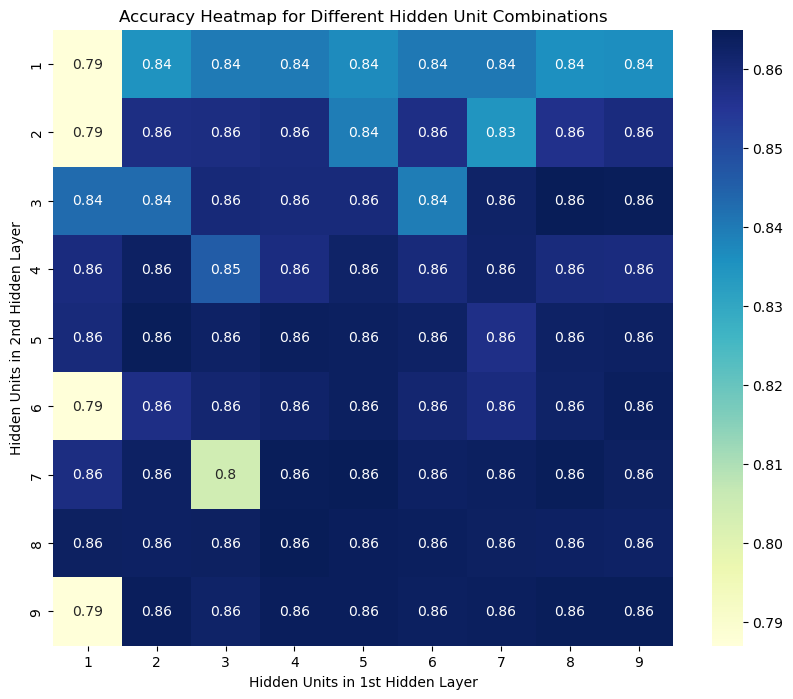

In [73]:
# Define the range of hidden units for each hidden layer
hidden_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Initialize an empty 2D array to store accuracies
accuracy_matrix = np.zeros((len(hidden_sizes), len(hidden_sizes)))

# Loop through each combination of hidden units for the two hidden layers
for i, size1 in enumerate(hidden_sizes):
    for j, size2 in enumerate(hidden_sizes):
        # Initialize MLPClassifier with current number of hidden units in each hidden layer
        clf = MLPClassifier(hidden_layer_sizes=(size1, size2), random_state=42, batch_size=1000)
        
        # Fit the model to the training data
        clf.fit(X_train, y_train)
        
        # Evaluate accuracy on the test data
        accuracy = clf.score(X_test, y_test)
        
        # Store accuracy in the accuracy matrix
        accuracy_matrix[i, j] = accuracy

# Create a heatmap of accuracies
plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_matrix, annot=True, cmap="YlGnBu", xticklabels=hidden_sizes, yticklabels=hidden_sizes)
plt.xlabel('Hidden Units in 1st Hidden Layer')
plt.ylabel('Hidden Units in 2nd Hidden Layer')
plt.title('Accuracy Heatmap for Different Hidden Unit Combinations')
plt.show()

#### Find the best combination of the activation function and optimizer using RandomizedSearchCV

In [74]:
# Define the parameter grid
parameters = {
    'solver': ['sgd', 'adam'],
    'activation': ['relu', 'tanh']
}

# Set the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(9,9,), random_state=42, batch_size=1000)

# Set RandomizedSearchCV
# For cross-validation, specify that (Stratified)KFold should be 3
random_search = RandomizedSearchCV(clf, parameters, cv=3, scoring='accuracy', random_state=42)

# Perform random search
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 

Best Parameters: {'solver': 'adam', 'activation': 'tanh'}
Best Accuracy: 0.8644595423663342


#### Find the best combination of the activation function and optimizer using GridSearchCV

In [75]:
# Define the parameter grid
parameters = {
    'solver': ['sgd', 'adam'],
    'activation': ['relu', 'tanh']
}

# Set the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(9,9,), random_state=42, batch_size=1000)

# Set RandomizedSearchCV
# For cross-validation, specify that (Stratified)KFold should be 3
grid_search = GridSearchCV(clf, parameters, cv=3, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yumi/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConve

Best Parameters: {'activation': 'tanh', 'solver': 'adam'}
Best Accuracy: 0.8644595423663342


In [197]:
# Define the second MLP model
# 2 hidden layers with 9 nodes for each hidden layer
hidden_size = 9

class MLP_model2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP_model2, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        output_layer1 = self.fc1(x)
        layer1_activated = self.tanh(output_layer1)
        output_layer2 = self.fc2(layer1_activated)
        layer2_activated = self.tanh(output_layer2)
        output_layer3 = self.fc3(layer2_activated)
        output_activated = self.sigmoid(output_layer3)
        return output_activated

In [198]:
# Set the baseline of MLP model, loss function and optimizer
mlp_model2 = MLP_model2(input_size, hidden_size, output_size)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(mlp_model2.parameters(), lr=0.001) # The learning rate is set to the default value

#### Train the second MLP model

In [199]:
# Set the start timer
start_time = time.time()

# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
for fold, (train_indices, val_indices) in enumerate(kfold.split(X_train, y_train)):
    print(f'Fold {fold + 1}/{k_folds}')
    
    # Get the data for this fold
    X_train_fold = X_train[train_indices]
    y_train_fold = y_train[train_indices]
    X_val_fold = X_train[val_indices]
    y_val_fold = y_train[val_indices]
    
    # Convert fold data into TensorDatasets
    train_dataset_fold = TensorDataset(X_train_fold, y_train_fold)
    val_dataset_fold = TensorDataset(X_val_fold, y_val_fold)
    
    # Create DataLoader objects for fold training and validation sets
    train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
    val_loader_fold = DataLoader(val_dataset_fold, batch_size=batch_size, shuffle=False)
    
    # Train for each fold
    for epoch in range(number_of_epochs):
        mlp_model2.train()
        epoch_train_loss = 0.0
        
        for batch_X_train, batch_y_train in train_loader_fold:
            optimizer.zero_grad()
            outputs = mlp_model2(batch_X_train)
            loss = criterion(outputs, batch_y_train)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item() * batch_X_train.size(0)
        
        epoch_train_loss /= len(train_loader_fold.dataset)
        train_losses.append(epoch_train_loss)
        
        # Print train loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Fold [{fold + 1}/{k_folds}], Train Loss: {epoch_train_loss:.4f}')
        
        # Validation
        mlp_model2.eval()
        epoch_val_loss = 0.0
        
        with torch.no_grad():
            for batch_X_val, batch_y_val in val_loader_fold:
                outputs_val = mlp_model2(batch_X_val)
                val_loss = criterion(outputs_val, batch_y_val)
                epoch_val_loss += val_loss.item() * batch_X_val.size(0)
        
        epoch_val_loss /= len(val_loader_fold.dataset)
        val_losses.append(epoch_val_loss)
        
        # Print validation loss
        print(f'Epoch [{epoch + 1}/{number_of_epochs}], Fold [{fold + 1}/{k_folds}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_validation_time, "seconds")


Fold 1/3
Epoch [1/100], Fold [1/3], Train Loss: 0.6307
Epoch [1/100], Fold [1/3], Validation Loss: 0.5309
Epoch [2/100], Fold [1/3], Train Loss: 0.5119
Epoch [2/100], Fold [1/3], Validation Loss: 0.5022
Epoch [3/100], Fold [1/3], Train Loss: 0.4909
Epoch [3/100], Fold [1/3], Validation Loss: 0.4756
Epoch [4/100], Fold [1/3], Train Loss: 0.4635
Epoch [4/100], Fold [1/3], Validation Loss: 0.4520
Epoch [5/100], Fold [1/3], Train Loss: 0.4459
Epoch [5/100], Fold [1/3], Validation Loss: 0.4377
Epoch [6/100], Fold [1/3], Train Loss: 0.4315
Epoch [6/100], Fold [1/3], Validation Loss: 0.4231
Epoch [7/100], Fold [1/3], Train Loss: 0.4169
Epoch [7/100], Fold [1/3], Validation Loss: 0.4096
Epoch [8/100], Fold [1/3], Train Loss: 0.4060
Epoch [8/100], Fold [1/3], Validation Loss: 0.4015
Epoch [9/100], Fold [1/3], Train Loss: 0.4004
Epoch [9/100], Fold [1/3], Validation Loss: 0.3977
Epoch [10/100], Fold [1/3], Train Loss: 0.3978
Epoch [10/100], Fold [1/3], Validation Loss: 0.3959
Epoch [11/100], Fol

Epoch [84/100], Fold [1/3], Train Loss: 0.3347
Epoch [84/100], Fold [1/3], Validation Loss: 0.3346
Epoch [85/100], Fold [1/3], Train Loss: 0.3347
Epoch [85/100], Fold [1/3], Validation Loss: 0.3350
Epoch [86/100], Fold [1/3], Train Loss: 0.3348
Epoch [86/100], Fold [1/3], Validation Loss: 0.3347
Epoch [87/100], Fold [1/3], Train Loss: 0.3349
Epoch [87/100], Fold [1/3], Validation Loss: 0.3355
Epoch [88/100], Fold [1/3], Train Loss: 0.3346
Epoch [88/100], Fold [1/3], Validation Loss: 0.3346
Epoch [89/100], Fold [1/3], Train Loss: 0.3345
Epoch [89/100], Fold [1/3], Validation Loss: 0.3345
Epoch [90/100], Fold [1/3], Train Loss: 0.3345
Epoch [90/100], Fold [1/3], Validation Loss: 0.3343
Epoch [91/100], Fold [1/3], Train Loss: 0.3344
Epoch [91/100], Fold [1/3], Validation Loss: 0.3343
Epoch [92/100], Fold [1/3], Train Loss: 0.3343
Epoch [92/100], Fold [1/3], Validation Loss: 0.3342
Epoch [93/100], Fold [1/3], Train Loss: 0.3344
Epoch [93/100], Fold [1/3], Validation Loss: 0.3342
Epoch [94/

Epoch [67/100], Fold [2/3], Train Loss: 0.3279
Epoch [67/100], Fold [2/3], Validation Loss: 0.3297
Epoch [68/100], Fold [2/3], Train Loss: 0.3279
Epoch [68/100], Fold [2/3], Validation Loss: 0.3292
Epoch [69/100], Fold [2/3], Train Loss: 0.3278
Epoch [69/100], Fold [2/3], Validation Loss: 0.3291
Epoch [70/100], Fold [2/3], Train Loss: 0.3279
Epoch [70/100], Fold [2/3], Validation Loss: 0.3289
Epoch [71/100], Fold [2/3], Train Loss: 0.3275
Epoch [71/100], Fold [2/3], Validation Loss: 0.3290
Epoch [72/100], Fold [2/3], Train Loss: 0.3275
Epoch [72/100], Fold [2/3], Validation Loss: 0.3290
Epoch [73/100], Fold [2/3], Train Loss: 0.3274
Epoch [73/100], Fold [2/3], Validation Loss: 0.3287
Epoch [74/100], Fold [2/3], Train Loss: 0.3272
Epoch [74/100], Fold [2/3], Validation Loss: 0.3287
Epoch [75/100], Fold [2/3], Train Loss: 0.3272
Epoch [75/100], Fold [2/3], Validation Loss: 0.3285
Epoch [76/100], Fold [2/3], Train Loss: 0.3271
Epoch [76/100], Fold [2/3], Validation Loss: 0.3291
Epoch [77/

Epoch [50/100], Fold [3/3], Train Loss: 0.3238
Epoch [50/100], Fold [3/3], Validation Loss: 0.3236
Epoch [51/100], Fold [3/3], Train Loss: 0.3238
Epoch [51/100], Fold [3/3], Validation Loss: 0.3234
Epoch [52/100], Fold [3/3], Train Loss: 0.3239
Epoch [52/100], Fold [3/3], Validation Loss: 0.3232
Epoch [53/100], Fold [3/3], Train Loss: 0.3238
Epoch [53/100], Fold [3/3], Validation Loss: 0.3233
Epoch [54/100], Fold [3/3], Train Loss: 0.3239
Epoch [54/100], Fold [3/3], Validation Loss: 0.3233
Epoch [55/100], Fold [3/3], Train Loss: 0.3238
Epoch [55/100], Fold [3/3], Validation Loss: 0.3232
Epoch [56/100], Fold [3/3], Train Loss: 0.3237
Epoch [56/100], Fold [3/3], Validation Loss: 0.3234
Epoch [57/100], Fold [3/3], Train Loss: 0.3246
Epoch [57/100], Fold [3/3], Validation Loss: 0.3231
Epoch [58/100], Fold [3/3], Train Loss: 0.3237
Epoch [58/100], Fold [3/3], Validation Loss: 0.3235
Epoch [59/100], Fold [3/3], Train Loss: 0.3237
Epoch [59/100], Fold [3/3], Validation Loss: 0.3231
Epoch [60/

In [200]:
# Initialize an empty list to store average train losses
average_train_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(train_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch (every k_folds-th element)
    epoch_losses = train_losses[epoch::number_of_epochs]
    
    # Calculate the average loss for this epoch
    average_epoch_loss = np.mean(epoch_losses)
    
    # Append the average loss to the list of average train losses
    average_train_losses.append(average_epoch_loss)

In [201]:
# Initialize an empty list to store average train losses
average_val_losses = []

# Calculate the number of batches per epoch
batches_per_epoch = len(val_loader_fold)

# Aggregate losses for each epoch
for epoch in range(number_of_epochs):
    # Get losses for the current epoch (every k_folds-th element)
    epoch_val_losses = val_losses[epoch::number_of_epochs]
    
    # Calculate the average loss for this epoch
    average_epoch_val_loss = np.mean(epoch_val_losses)
    
    # Append the average loss to the list of average train losses
    average_val_losses.append(average_epoch_val_loss)

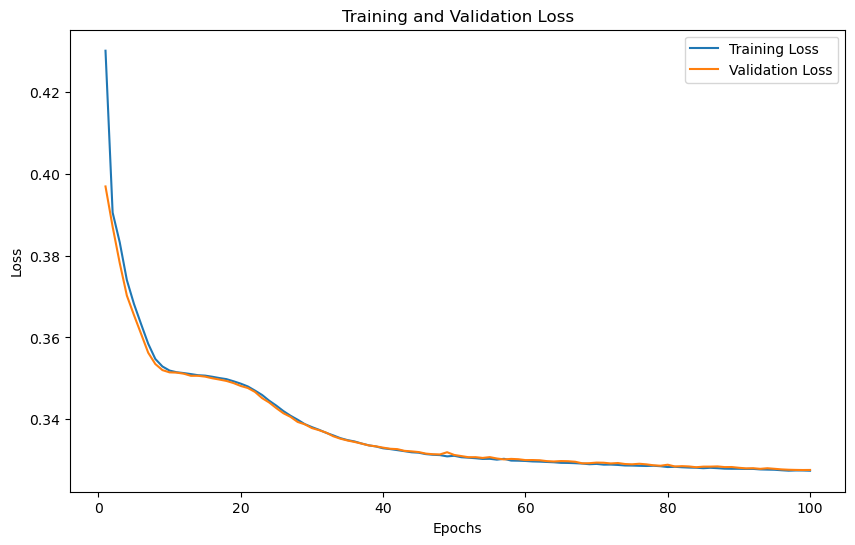

In [202]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, average_train_losses, label='Training Loss')
plt.plot(Epochs, average_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [83]:
# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Set the start timer
start_time = time.time()

# Training
for epoch in range(number_of_epochs):
    mlp_model2.train()
    
    # New variable to track the training loss in each epoch
    epoch_train_loss = 0.0
    
    # Iterate over batches in train_loader
    for batch_X_train, batch_y_train in train_loader:
        optimizer.zero_grad()
        
        # Feed forward
        outputs = mlp_model2(batch_X_train)
        
        # Calculate loss
        loss = criterion(outputs, batch_y_train)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        # Keep adding each batch loss to the loss in epochs
        epoch_train_loss += loss.item() * batch_X_train.size(0)  # Multiply by batch size
    
    # Calculate average train loss for the epoch
    epoch_train_loss /= len(train_loader.dataset)
    
    # Store training loss for plotting
    train_losses.append(epoch_train_loss)
    
    # Print train loss
    print(f'Epoch [{epoch+1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
    
    # Validation
    mlp_model2.eval()
    
    # New variable to track the validation loss in each epoch
    epoch_val_loss = 0.0
    
    with torch.no_grad():
        for batch_X_val, batch_y_val in val_loader:
            outputs_val = mlp_model2(batch_X_val)
            
            # Calculate loss
            val_loss = criterion(outputs_val, batch_y_val)
            
            # Keep adding each bach loss to get the loss in epochs
            epoch_val_loss += val_loss.item() * batch_X_val.size(0)  # Multiply by batch size
    
    # Calculate average validation loss for the epoch
    epoch_val_loss /= len(val_loader.dataset)
    
    # Store validation loss for plotting
    val_losses.append(epoch_val_loss)
    
    # Print validation loss
    print(f'Epoch [{epoch+1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

# Set the end timer
end_time = time.time()

# Calculate the elapsed training and validation time
training_validation_time = end_time - start_time

# Print the elapsed time
print("Training & Validation Time:", training_time, "seconds")

Epoch [1/100], Train Loss: 0.5461
Epoch [1/100], Validation Loss: 0.4942
Epoch [2/100], Train Loss: 0.4742
Epoch [2/100], Validation Loss: 0.4478
Epoch [3/100], Train Loss: 0.4386
Epoch [3/100], Validation Loss: 0.4240
Epoch [4/100], Train Loss: 0.4148
Epoch [4/100], Validation Loss: 0.4026
Epoch [5/100], Train Loss: 0.3994
Epoch [5/100], Validation Loss: 0.3955
Epoch [6/100], Train Loss: 0.3956
Epoch [6/100], Validation Loss: 0.3935
Epoch [7/100], Train Loss: 0.3936
Epoch [7/100], Validation Loss: 0.3916
Epoch [8/100], Train Loss: 0.3915
Epoch [8/100], Validation Loss: 0.3891
Epoch [9/100], Train Loss: 0.3888
Epoch [9/100], Validation Loss: 0.3861
Epoch [10/100], Train Loss: 0.3852
Epoch [10/100], Validation Loss: 0.3821
Epoch [11/100], Train Loss: 0.3808
Epoch [11/100], Validation Loss: 0.3773
Epoch [12/100], Train Loss: 0.3757
Epoch [12/100], Validation Loss: 0.3715
Epoch [13/100], Train Loss: 0.3703
Epoch [13/100], Validation Loss: 0.3661
Epoch [14/100], Train Loss: 0.3650
Epoch [1

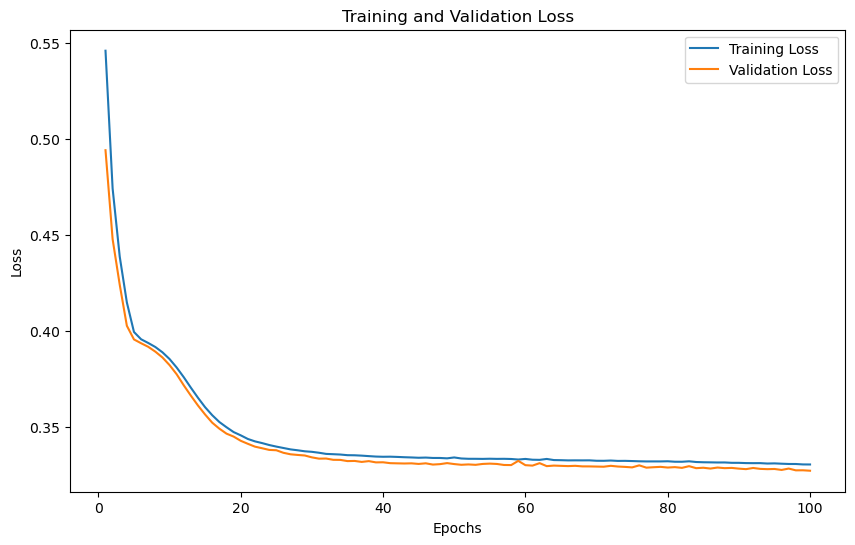

In [84]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, train_losses, label='Training Loss')
plt.plot(Epochs, val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [203]:
# Test the model on the test set
mlp_model2.eval()

# Initialize variables to track correct predictions and total examples
correct = 0
total = 0

# Disable gradient calculation for efficiency
with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Forward pass
        outputs_test = mlp_model2(batch_X_test)
        
        # Convert outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total examples and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')


Test Accuracy: 86.49


In [204]:
# Calculate = True Positive (TP), True Nagative (TN), False Positive (FP), False Nagative (FN)
# The code in this block is from the coursework
TP = ((outputs_test.round() == 1) & (batch_y_test == 1)).sum().item()
TN = ((outputs_test.round() == 0) & (batch_y_test == 0)).sum().item()
FP = ((outputs_test.round() == 1) & (batch_y_test == 0)).sum().item()
FN = ((outputs_test.round() == 0) & (batch_y_test == 1)).sum().item()

# Calculate the confusion matrix
# Measure Precision, Recall, and F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Test Precision: {precision*100:.2f}')
print(f'Test Recall: {recall*100:.2f}')
print(f'Test F1 score: {f1*100:.2f}')

Test Precision: 76.19
Test Recall: 56.64
Test F1 score: 64.97


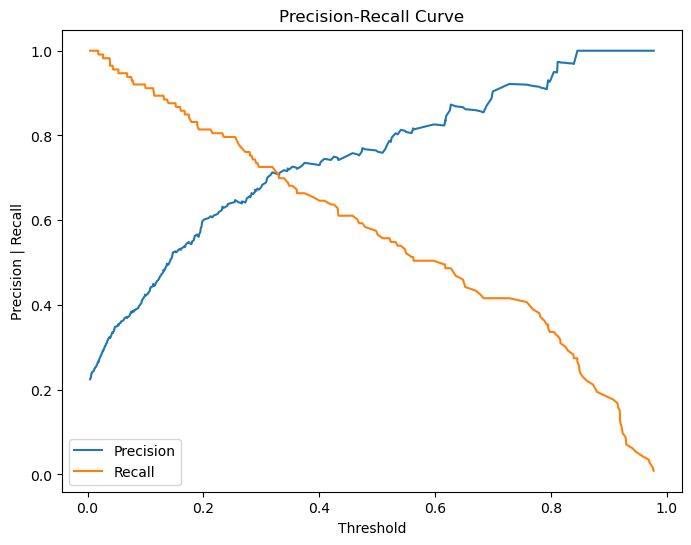

In [205]:
# Import the library to plot precision-recall curve
from sklearn.metrics import precision_recall_curve

# Assign precisions, recalls, and the thresholds between two evaluation indicators
precisions, recalls, thresholds = precision_recall_curve(batch_y_test, outputs_test)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision | Recall')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [206]:
# Calculate F1 score for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the index of the threshold with the maximum F1 score
best_threshold_index = np.argmax(f1_scores)

# Get the threshold from the index of the threshold
best_threshold = thresholds[best_threshold_index]

print(f'Best Threshold: {best_threshold}')

Best Threshold: 0.31905752420425415


#### Define the third MLP model with 3 hidden layers using an arbitrary approach

In [ ]:
# Define the third MLP model
# 3 hidden layers with 9 nodes for each hidden layer
hidden_size = 9

class MLP_model3(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP_model3, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.tanh = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        output_layer1 = self.fc1(x)
        layer1_activated = self.tanh(output_layer1)
        output_layer2 = self.fc2(layer1_activated)
        layer2_activated = self.tanh(output_layer2)
        output_layer3 = self.fc3(layer2_activated)
        layer3_activated = self.tanh(output_layer3)
        output_layer4 = self.fc4(layer3_activated)
        output_activated = self.sigmoid(output_layer4)
        return output_activated

In [ ]:
# Set the baseline of MLP model, loss function and optimizer
mlp_model3 = MLP_model3(input_size, hidden_size, output_size)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(mlp_model3.parameters(), lr=0.001) # The learning rate is set to the default value

In [ ]:
# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
for epoch in range(number_of_epochs):
    mlp_model3.train()
    
    # New variable to track the training loss in each epoch
    epoch_train_loss = 0.0
    
    # Iterate over batches in train_loader
    for batch_X_train, batch_y_train in train_loader:
        optimizer.zero_grad()
        
        # Feed forward
        outputs = mlp_model3(batch_X_train)
        
        # Calculate loss
        loss = criterion(outputs, batch_y_train)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        # Keep adding each batch loss to the loss in epochs
        epoch_train_loss += loss.item() * batch_X_train.size(0)  # Multiply by batch size
    
    # Calculate average train loss for the epoch
    epoch_train_loss /= len(train_loader.dataset)
    
    # Store training loss for plotting
    train_losses.append(epoch_train_loss)
    
    # Print train loss
    print(f'Epoch [{epoch+1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')
    
    # Validation
    mlp_model3.eval()
    
    # New variable to track the validation loss in each epoch
    epoch_val_loss = 0.0
    
    with torch.no_grad():
        for batch_X_val, batch_y_val in val_loader:
            outputs_val = mlp_model3(batch_X_val)
            
            # Calculate loss
            val_loss = criterion(outputs_val, batch_y_val)
            
            # Keep adding each bach loss to get the loss in epochs
            epoch_val_loss += val_loss.item() * batch_X_val.size(0)  # Multiply by batch size
    
    # Calculate average validation loss for the epoch
    epoch_val_loss /= len(val_loader.dataset)
    
    # Store validation loss for plotting
    val_losses.append(epoch_val_loss)
    
    # Print validation loss
    print(f'Epoch [{epoch+1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, train_losses, label='Training Loss')
plt.plot(Epochs, val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Test the model on the test set
mlp_model3.eval()

# Initialize variables to track correct predictions and total examples
correct = 0
total = 0

# Disable gradient calculation for efficiency
with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Forward pass
        outputs_test = mlp_model3(batch_X_test)
        
        # Convert outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total examples and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

In [ ]:
# Calculate = True Positive (TP), True Nagative (TN), False Positive (FP), False Nagative (FN)
# The code in this block is from the coursework
TP = ((outputs_test.round() == 1) & (batch_y_test == 1)).sum().item()
TN = ((outputs_test.round() == 0) & (batch_y_test == 0)).sum().item()
FP = ((outputs_test.round() == 1) & (batch_y_test == 0)).sum().item()
FN = ((outputs_test.round() == 0) & (batch_y_test == 1)).sum().item()

# Calculate the confusion matrix
# Measure Precision, Recall, and F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Test Precision: {precision*100:.2f}')
print(f'Test Recall: {recall*100:.2f}')
print(f'Test F1 score: {f1*100:.2f}')

In [ ]:
# Import the library to plot precision-recall curve
from sklearn.metrics import precision_recall_curve

# Assign precisions, recalls, and the thresholds between two evaluation indicators
precisions, recalls, thresholds = precision_recall_curve(batch_y_test, outputs_test)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision | Recall')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
# Calculate F1 score for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Find the index of the threshold with the maximum F1 score
best_threshold_index = np.argmax(f1_scores)

# Get the threshold from the index of the threshold
best_threshold = thresholds[best_threshold_index]

print(f'Best Threshold: {best_threshold}')

3개 히든 레이어에 각 맞는 유닛 그리드 서치

In [ ]:
# Define the structure of the neural network model.
input_features = 10
output_features = 1

# Set the list of hyperparameters for grid search.
hidden_neurons_grid = [6, 7, 8, 9]

# Set the number of epochs.
number_of_epochs = 1000

# Define variables to store the item from the result of the model.
best_accuracy = 0.0
best_hyperparameters = {}

# Make empty lists to store the result of every combination of hyperparameters for visualisation.
#learning_rates_list_heatmap = []
#hidden_neurons_list_heatmap = []
#accuracy_list_heatmap = []

# Make an empty list to store the elapsed time from 1000 epochs of the best model.
import time
python_training_time_bestmodel = []

In [ ]:
# Define an empty list to store the training time from the best model.
Total_time = []

# Apply a nested loop for grid search.
for learning_rate in learning_rates_grid:
    for hidden_neurons in hidden_neurons_grid:
        print(f"\nTraining the NNet model with learning rate={learning_rate} and hidden_neurons={hidden_neurons}")
        # Call the function to train and evaluate the model with the nested loop.
        trained_model, train_loss, vali_loss, train_time = train_NN_model(learning_rate, hidden_neurons,
                                                                          X_train, y_train,
                                                                          X_vali, y_vali,
                                                                          number_of_epochs)                               
                            
        # Get the predictions from the X_val, and convert them to either 1 or 0.
        y_vali_pred = (trained_model(X_vali).detach().numpy() > 0.5).astype(int)
        # Calculate the validation accuracy.
        accuracy_validation_set = (y_vali_pred == y_vali.numpy()).mean()
        print("The validation accuracy = %.2f%%" % (accuracy_validation_set*100))
        
        # Append each value to the list for plotting.
        learning_rates_list_heatmap.append(learning_rate)
        hidden_neurons_list_heatmap.append(hidden_neurons)
        accuracy_list_heatmap.append(accuracy_validation_set)
        Total_time.append(train_time)
        
        # Pick the best model comparing the validation accuracy from each model.
        if accuracy_validation_set > best_accuracy: # If it is so,
            best_accuracy = accuracy_validation_set # Reassign the validation accuracy to the variable of 'best_accuracy'.
            # Define the best hyperparameters with the selected learning rate and the number of neurons.
            best_hyperparameters = {'learning_rate': learning_rate, 'hidden_neurons': hidden_neurons}
            # Pick the value of the loss and training time from the best model.
            train_loss_for_plotting = train_loss
            vali_loss_for_plotting = vali_loss
            python_training_time_bestmodel = train_time
            # Replace the model with the best model.
            best_model = trained_model

# Print the best hyperparameters from grid search.
print("\nThe Best Hyperparameters are ", best_hyperparameters)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
parameters = {
    'solver': ['sgd', 'adam', ],
    'activation': ['relu', 'tanh']
}

# Initialize the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(9,9,), random_state=42, batch_size=1000)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(clf, parameters, n_iter=5, cv=3, scoring='accuracy', random_state=42)

# Perform random search
random_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
parameters = {
    'solver': ['sgd', 'adam', 'lbfgs'],
    'activation': ['relu', 'tanh']
}

# Initialize the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(9,9,), random_state=42, batch_size=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=3, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid
parameters = {
    'solver': ['sgd', 'adam', 'lbfgs'],
    'activation': ['relu', 'tanh']
}

# Set the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(9,9,), random_state=42, batch_size=1000)

# Set the GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=3, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


- 3 hidden layers

In [ ]:
# Find the optimal nodes in 3
class SonarClassifier(nn.Module):
    def __init__(self, n_layers=3):
        super().__init__()
        self.layers = []
        self.acts = []
        for i in range(n_layers):
            self.layers.append(nn.Linear(60, 60))
            self.acts.append(nn.ReLU())
            self.add_module(f"layer{i}", self.layers[-1])
            self.add_module(f"act{i}", self.acts[-1])
        self.output = nn.Linear(60, 1)
 
    def forward(self, x):
        for layer, act in zip(self.layers, self.acts):
            x = act(layer(x))
        x = self.output(x)
        return x

In [ ]:
from skorch import NeuralNetClassifier
from sklearn.model_selection import GridSearchCV

# Define your neural network architecture using Skorch
class MLPNet(NeuralNetClassifier):
    def __init__(self, num_units=10, **kwargs):
        super().__init__(
            module=mlp_model2,
            criterion=torch.nn.CrossEntropyLoss,
            optimizer=torch.optim.Adam,
            max_epochs=100,
            batch_size=1000,
        )

# Define the parameter grid for the search
param_grid = {
    'module__num_units': [6, 7, 8, 9],  # Number of hidden units
    'module__num_layers': [1, 2, 3],    # Number of hidden layers
}

# Initialize the neural network
mlp = MLPNet()

# Initialize GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy')

# Perform grid search using Skorch and GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


#### Apply the learning rate scheduler to the second MLP model 

In [ ]:
# Import the library
import torch.optim.lr_scheduler as lr_scheduler

In [ ]:
# Set the baseline of MLP model, loss function and optimizer
mlp_model2 = MLP_model2(input_size, hidden_size, output_size)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(mlp_model2.parameters(), lr=0.001) # The learning rate is set to the default value

# Set the learning rate scheduler
# As the number of epochs is 100, select 25 as the step size and gamma 0.1 is the default value
scheduler = lr_scheduler.LinearLR(optimizer, start_factor=0.33, total_iters=4)

In [ ]:
# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
for epoch in range(number_of_epochs):
    mlp_model2.train()
    
    # New variable to track the training loss in each epoch
    epoch_train_loss = 0.0
    
    # Iterate over batches in train_loader
    for batch_X_train, batch_y_train in train_loader:
        optimizer.zero_grad()
        
        # Feed forward
        outputs = mlp_model2(batch_X_train)
        
        # Calculate loss
        loss = criterion(outputs, batch_y_train)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        # Keep adding each batch loss to the loss in epochs
        epoch_train_loss += loss.item() * batch_X_train.size(0)  # Multiply by batch size

    # Calculate average train loss for the epoch
    epoch_train_loss /= len(train_loader.dataset)
    
    # Store training loss for plotting
    train_losses.append(epoch_train_loss)
    
    # Print train loss
    print(f'Epoch [{epoch+1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')

    # Step the learning rate scheduler
    scheduler.step()
    
    # Validation
    mlp_model2.eval()
    
    # New variable to track the validation loss in each epoch
    epoch_val_loss = 0.0
    
    with torch.no_grad():
        for batch_X_val, batch_y_val in val_loader:
            outputs_val = mlp_model2(batch_X_val)
            
            # Calculate loss
            val_loss = criterion(outputs_val, batch_y_val)
            
            # Keep adding each bach loss to get the loss in epochs
            epoch_val_loss += val_loss.item() * batch_X_val.size(0)  # Multiply by batch size
    
    # Calculate average validation loss for the epoch
    epoch_val_loss /= len(val_loader.dataset)
    
    # Store validation loss for plotting
    val_losses.append(epoch_val_loss)
    
    # Print validation loss
    print(f'Epoch [{epoch+1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, train_losses, label='Training Loss')
plt.plot(Epochs, val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Test the model on the test set
mlp_model2.eval()

# Make variables to track correct predictions and total y_test datapoints
correct = 0
total = 0

with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Feed forward
        outputs_test = mlp_model2(batch_X_test)
        
        # Convert outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total y_test datapoints and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy*100:.2f}')

In [ ]:
# Calculate = True Positive (TP), True Nagative (TN), False Positive (FP), False Nagative (FN)
# The code in this block is from the coursework
TP = ((outputs_test.round() == 1) & (batch_y_test == 1)).sum().item()
TN = ((outputs_test.round() == 0) & (batch_y_test == 0)).sum().item()
FP = ((outputs_test.round() == 1) & (batch_y_test == 0)).sum().item()
FN = ((outputs_test.round() == 0) & (batch_y_test == 1)).sum().item()

# Calculate the confusion matrix
# Measure Precision, Recall, and F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Test Precision: {precision*100:.2f}')
print(f'Test Recall: {recall*100:.2f}')
print(f'Test F1 score: {f1*100:.2f}')

In [ ]:
# Set the baseline of MLP model, loss function and optimizer
mlp_model2 = MLP_model2(input_size, hidden_size, output_size)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(mlp_model2.parameters(), lr=0.001) # The learning rate is set to the default value

# Set the learning rate scheduler
# As the number of epochs is 100, select 25 as the step size and gamma 0.1 is the default value
scheduler = lr_scheduler.LinearLR(optimizer, start_factor=0.33, total_iters=100)

In [ ]:
# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
for epoch in range(number_of_epochs):
    mlp_model2.train()
    
    # New variable to track the training loss in each epoch
    epoch_train_loss = 0.0
    
    # Iterate over batches in train_loader
    for batch_X_train, batch_y_train in train_loader:
        optimizer.zero_grad()
        
        # Feed forward
        outputs = mlp_model2(batch_X_train)
        
        # Calculate loss
        loss = criterion(outputs, batch_y_train)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        # Keep adding each batch loss to the loss in epochs
        epoch_train_loss += loss.item() * batch_X_train.size(0)  # Multiply by batch size

    # Calculate average train loss for the epoch
    epoch_train_loss /= len(train_loader.dataset)
    
    # Store training loss for plotting
    train_losses.append(epoch_train_loss)
    
    # Print train loss
    print(f'Epoch [{epoch+1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')

    # Step the learning rate scheduler
    scheduler.step()
    
    # Validation
    mlp_model2.eval()
    
    # New variable to track the validation loss in each epoch
    epoch_val_loss = 0.0
    
    with torch.no_grad():
        for batch_X_val, batch_y_val in val_loader:
            outputs_val = mlp_model2(batch_X_val)
            
            # Calculate loss
            val_loss = criterion(outputs_val, batch_y_val)
            
            # Keep adding each bach loss to get the loss in epochs
            epoch_val_loss += val_loss.item() * batch_X_val.size(0)  # Multiply by batch size
    
    # Calculate average validation loss for the epoch
    epoch_val_loss /= len(val_loader.dataset)
    
    # Store validation loss for plotting
    val_losses.append(epoch_val_loss)
    
    # Print validation loss
    print(f'Epoch [{epoch+1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, train_losses, label='Training Loss')
plt.plot(Epochs, val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Test the model on the test set
mlp_model2.eval()

# Initialize variables to track correct predictions and total examples
correct = 0
total = 0

# Disable gradient calculation for efficiency
with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Forward pass
        outputs_test = mlp_model2(batch_X_test)
        
        # Convert outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total examples and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')


In [ ]:
# Calculate = True Positive (TP), True Nagative (TN), False Positive (FP), False Nagative (FN)
# The code in this block is from the coursework
TP = ((outputs_test.round() == 1) & (batch_y_test == 1)).sum().item()
TN = ((outputs_test.round() == 0) & (batch_y_test == 0)).sum().item()
FP = ((outputs_test.round() == 1) & (batch_y_test == 0)).sum().item()
FN = ((outputs_test.round() == 0) & (batch_y_test == 1)).sum().item()

# Calculate the confusion matrix
# Measure Precision, Recall, and F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Test Precision: {precision*100:.2f}')
print(f'Test Recall: {recall*100:.2f}')
print(f'Test F1 score: {f1*100:.2f}')

In [ ]:
# Set the baseline of MLP model, loss function and optimizer
mlp_model2 = MLP_model2(input_size, hidden_size, output_size)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(mlp_model2.parameters(), lr=0.001) # The learning rate is set to the default value

# Set the learning rate scheduler
# As the number of epochs is 100, select 25 as the step size and gamma 0.1 is the default value
scheduler = lr_scheduler.PolynomialLR(optimizer, total_iters=100, power=1.0)

In [ ]:
# Make empty lists to store losses for a loss plot
train_losses = []
val_losses = []

# Training
for epoch in range(number_of_epochs):
    mlp_model2.train()
    
    # New variable to track the training loss in each epoch
    epoch_train_loss = 0.0
    
    # Iterate over batches in train_loader
    for batch_X_train, batch_y_train in train_loader:
        optimizer.zero_grad()
        
        # Feed forward
        outputs = mlp_model2(batch_X_train)
        
        # Calculate loss
        loss = criterion(outputs, batch_y_train)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        # Keep adding each batch loss to the loss in epochs
        epoch_train_loss += loss.item() * batch_X_train.size(0)  # Multiply by batch size

    # Calculate average train loss for the epoch
    epoch_train_loss /= len(train_loader.dataset)
    
    # Store training loss for plotting
    train_losses.append(epoch_train_loss)
    
    # Print train loss
    print(f'Epoch [{epoch+1}/{number_of_epochs}], Train Loss: {epoch_train_loss:.4f}')

    # Step the learning rate scheduler
    scheduler.step()
    
    # Validation
    mlp_model2.eval()
    
    # New variable to track the validation loss in each epoch
    epoch_val_loss = 0.0
    
    with torch.no_grad():
        for batch_X_val, batch_y_val in val_loader:
            outputs_val = mlp_model2(batch_X_val)
            
            # Calculate loss
            val_loss = criterion(outputs_val, batch_y_val)
            
            # Keep adding each bach loss to get the loss in epochs
            epoch_val_loss += val_loss.item() * batch_X_val.size(0)  # Multiply by batch size
    
    # Calculate average validation loss for the epoch
    epoch_val_loss /= len(val_loader.dataset)
    
    # Store validation loss for plotting
    val_losses.append(epoch_val_loss)
    
    # Print validation loss
    print(f'Epoch [{epoch+1}/{number_of_epochs}], Validation Loss: {epoch_val_loss:.4f}')

In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(Epochs, train_losses, label='Training Loss')
plt.plot(Epochs, val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Test the model on the test set
mlp_model2.eval()

# Initialize variables to track correct predictions and total examples
correct = 0
total = 0

# Disable gradient calculation for efficiency
with torch.no_grad():
    for batch_X_test, batch_y_test in test_loader:
        # Forward pass
        outputs_test = mlp_model2(batch_X_test)
        
        # Convert outputs to predicted class (0 or 1)
        predicted = (outputs_test > 0.5).float()
        
        # Count total examples and correct predictions
        total += batch_y_test.size(0)
        correct += (predicted == batch_y_test).sum().item()

# Calculate accuracy
accuracy = correct / total
print(f'Test Accuracy: {accuracy:.4f}')

In [ ]:
# Calculate = True Positive (TP), True Nagative (TN), False Positive (FP), False Nagative (FN)
# The code in this block is from the coursework
TP = ((outputs_test.round() == 1) & (batch_y_test == 1)).sum().item()
TN = ((outputs_test.round() == 0) & (batch_y_test == 0)).sum().item()
FP = ((outputs_test.round() == 1) & (batch_y_test == 0)).sum().item()
FN = ((outputs_test.round() == 0) & (batch_y_test == 1)).sum().item()

# Calculate the confusion matrix
# Measure Precision, Recall, and F1 score
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall)

print(f'Test Precision: {precision*100:.2f}')
print(f'Test Recall: {recall*100:.2f}')
print(f'Test F1 score: {f1*100:.2f}')

### 4. Build the baseline model with Support Vector Machines(SVM)

In [140]:
print("Training set:")
print("X:", X.shape)
print("y:", y.shape)

Training set:
X: torch.Size([165034, 10])
y: torch.Size([165034, 1])


In [141]:
# Convert PyTorch tensors to NumPy arrays
X_numpy = X.numpy()
y_numpy = y.numpy()

In [142]:
print("Training set:")
print("X:", X_numpy.shape)
print("y:", y_numpy.shape)

Training set:
X: (165034, 10)
y: (165034, 1)


In [143]:
# Check each dimension
print("Training set:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("\nValidation set:")
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("\nTest set:")
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

Training set:
X_train: torch.Size([132027, 10])
y_train: torch.Size([132027, 1])

Validation set:
X_val: torch.Size([16504, 10])
y_val: torch.Size([16504, 1])

Test set:
X_test: torch.Size([16503, 10])
y_test: torch.Size([16503, 1])


In [144]:
# Convert PyTorch tensors to NumPy arrays
X_train_numpy = X_train.numpy()
y_train_numpy = y_train.numpy()
X_val_numpy = X_val.numpy()
y_val_numpy = y_val.numpy()
X_test_numpy = X_test.numpy()
y_test_numpy = y_test.numpy()

In [145]:
# Check each dimension
print("Training set:")
print("X_train_numpy:", X_train_numpy.shape)
print("y_train_numpy:", y_train_numpy.shape)
print("\nValidation set:")
print("X_val_numpy:", X_val_numpy.shape)
print("y_val_numpy:", y_val_numpy.shape)
print("\nTest set:")
print("X_test_numpy:", X_test_numpy.shape)
print("y_test_numpy:", y_test_numpy.shape)

Training set:
X_train_numpy: (132027, 10)
y_train_numpy: (132027, 1)

Validation set:
X_val_numpy: (16504, 10)
y_val_numpy: (16504, 1)

Test set:
X_test_numpy: (16503, 10)
y_test_numpy: (16503, 1)


In [146]:
#Create the baxeline SVM classifier
baseline_svm_model = svm.SVC(kernel='linear') # Linear Kernel

In [147]:
from sklearn.metrics import accuracy_score

In [148]:
# Record the start time
start_time = time.time()

# Train the SVM model
baseline_svm_model.fit(X_train_numpy, y_train_numpy)

# Record the end time
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time
print("Training Time:", training_time, "seconds")

Training Time: 442.4209849834442 seconds


In [149]:
train_predictions = baseline_svm_model.predict(X_train_numpy)
train_accuracy = accuracy_score(y_train_numpy, train_predictions)
print("Train Accuracy:", train_accuracy)

Train Accuracy: 0.8298757072417006


In [150]:
val_predictions = baseline_svm_model.predict(X_val_numpy)
val_accuracy = accuracy_score(y_val_numpy, val_predictions)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.8308288899660689


In [151]:
test_predictions = baseline_svm_model.predict(X_test_numpy)
test_accuracy = accuracy_score(y_test_numpy, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8301520935587469


In [152]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Validation metrics
val_precision = precision_score(y_val_numpy, val_predictions)
val_recall = recall_score(y_val_numpy, val_predictions)
val_f1_score = f1_score(y_val_numpy, val_predictions)

print("Validation Precision:", val_precision)
print("Validation Recall:", val_recall)
print("Validation F1 Score:", val_f1_score)

# Test metrics
test_precision = precision_score(y_test_numpy, test_predictions)
test_recall = recall_score(y_test_numpy, test_predictions)
test_f1_score = f1_score(y_test_numpy, test_predictions)

print("Test Precision:", test_precision)
print("Test Recall:", test_recall)
print("Test F1 Score:", test_f1_score)


Validation Precision: 0.7219178082191781
Validation Recall: 0.3063953488372093
Validation F1 Score: 0.4302040816326531
Test Precision: 0.7211180124223603
Test Recall: 0.330298719772404
Test F1 Score: 0.45307317073170733


In [ ]:
# Assuming you have validation and test data as NumPy arrays: X_val_numpy, y_val_numpy, X_test_numpy, y_test_numpy

# Validation accuracy
val_predictions = baseline_svm_model.predict(X_val_numpy)
val_accuracy = accuracy_score(y_val_numpy, val_predictions)
print("Validation Accuracy:", val_accuracy)

# Test accuracy
test_predictions = baseline_svm_model.predict(X_test_numpy)
test_accuracy = accuracy_score(y_test_numpy, test_predictions)
print("Test Accuracy:", test_accuracy)


In [ ]:
# Define batch size and calculate the number of batches
batch_size = 1000
num_train_batches = len(train_data) // batch_size
num_val_batches = len(val_data) // batch_size

# Training loop
for epoch in range(number_of_epochs):
    for batch_idx in range(num_train_batches):
        # Extract a batch of data and labels
        batch_X_train = train_data[batch_idx*batch_size : (batch_idx+1)*batch_size]
        batch_y_train = train_labels[batch_idx*batch_size : (batch_idx+1)*batch_size]
        
        # Fit the SVM model on the batch
        baseline_svm_model.fit(batch_X_train, batch_y_train)

# Validation loop
val_predictions = []
for batch_idx in range(num_val_batches):
    # Extract a batch of validation data
    batch_X_val = val_data[batch_idx*batch_size : (batch_idx+1)*batch_size]
    
    # Predict on the batch
    batch_y_pred = baseline_svm_model.predict(batch_X_val)
    val_predictions.extend(batch_y_pred)

# Calculate validation accuracy
val_accuracy = accuracy_score(val_labels[:num_val_batches*batch_size], val_predictions)
print("Validation Accuracy:", val_accuracy)


In [ ]:
from sklearn.metrics import accuracy_score

# Initialize lists to store predictions and true labels
all_predictions = []
all_true_labels = []

# Training loop
for batch_X_train, batch_y_train in train_loader:
    baseline_svm_model.fit(batch_X_train, batch_y_train)

# Validation loop
for batch_X_val, batch_y_val in val_loader:
    batch_y_pred = baseline_svm_model.predict(batch_X_val)
    # Append predictions and true labels from current batch to the lists
    all_predictions.extend(batch_y_pred)
    all_true_labels.extend(batch_y_val)

# Calculate overall accuracy
overall_accuracy = accuracy_score(all_true_labels, all_predictions)
print("Overall Accuracy:", overall_accuracy)


In [ ]:

# 6. Evaluate the model
accuracy = accuracy_score(batch_y_val, batch_y_pred)
print("Accuracy:", accuracy)

# Other evaluation metrics
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
    baseline_svm_model.fit(batch_X_train, batch_y_train)

In [ ]:
# Import SMOTE to balance the target in training set.
from imblearn.over_sampling import SMOTE

# Create a variable for SMOTE
smote = SMOTE(random_state=random_state)

# Resampling the X and y in the training set using SMOTE.
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train the model with grid search

In [ ]:
# Check the best combination of hyperparameters.
print(best_hyperparameters)

best_learning_rate = best_hyperparameters['learning_rate']
best_hidden_neurons = best_hyperparameters['hidden_neurons']

print(best_learning_rate)
print(best_hidden_neurons)

In [ ]:
# Check the loss values from the best model.
train_loss_for_plotting

In [ ]:
# Convert from Tensor to list to plot using seaborn.
train_loss_for_plotting = [tensor_item.item() for tensor_item in train_loss_for_plotting]
vali_loss_for_plotting = [tensor_item.item() for tensor_item in vali_loss_for_plotting]
print(type(train_loss_for_plotting))
print(type(vali_loss_for_plotting))

# Create a numpy list for epochs which starts from 1 and ends with  1000.
Epochs = np.arange(1, number_of_epochs + 1)
type(Epochs)

# Model evaluation

In [ ]:
# Since the value in the training time is continuous, it needs to be changed cumulatively.
python_training_time_bestmodel = np.cumsum(python_training_time_bestmodel)

len(python_training_time_bestmodel)

In [ ]:
python_training_time_bestmodel

In [ ]:
# Plot the loss of the model in Python and that of the model in MATLAB.
fig = plt.figure(figsize=(12, 6))
plt.plot(Epochs, python_training_time_bestmodel, label='Python training time over 1,000 epochs')
plt.plot(Epochs, matlab_training_time_bestmodel, label='MATLAB training time over 1,000 epochs')
plt.xlabel('Epochs')
plt.ylabel('Time (Second)')
plt.legend()
plt.title('Accumulated training time of the best-trained model over epochs')
plt.show()

In [ ]:
# Combine the lists into a DataFrame
df_for_heatmap = pd.DataFrame({'Learning Rate': learning_rates_list_heatmap, 'Hidden Neurons': hidden_neurons_list_heatmap, 'Accuracy': accuracy_list_heatmap})

# Make a pivot table from the DataFrame to create a matrix which is suitable for a heatmap.
pivoted_heatmap_data = df_for_heatmap.pivot('Hidden Neurons', 'Learning Rate', 'Accuracy')

# Create a heatmap using seaborn.
plt.figure(figsize=(12, 8))
sns.heatmap(pivoted_heatmap_data, annot=True, cmap='viridis', fmt=".3f", linewidths=.5)
plt.title('The performance of every combination of hyperparameters')
plt.xlabel('Learning Rate (LR)')
plt.ylabel('Hidden Neurons')
plt.show()
